In [2]:
import cv2
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the .tif file
image_he = cv2.imread('h2114153 h&e.tif')
image_melan = cv2.imread('h2114153 melan.tif')
image_sox = cv2.imread('h2114153 sox10.tif')

# Convert to HSV
hsv_he = cv2.cvtColor(image_he, cv2.COLOR_BGR2HSV)
hsv_melan = cv2.cvtColor(image_melan, cv2.COLOR_BGR2HSV)
hsv_sox = cv2.cvtColor(image_sox, cv2.COLOR_BGR2HSV)

In [4]:
# Read the image
image = cv2.imread('image1.png')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [5]:
# Extract all the HSV ranges from the image
hsv_values = hsv_image.reshape(-1, 3)
unique_hsv = np.unique(hsv_values, axis = 0)
unique_hsv

array([[  0,   0, 254],
       [  0,   0, 255],
       [  0, 143, 255],
       [  0, 144, 249],
       [  0, 144, 253],
       [  0, 144, 254],
       [  0, 145, 248],
       [  0, 145, 251],
       [  0, 145, 252],
       [  0, 255, 255],
       [100,   3, 252],
       [100,   6, 250],
       [100,   9, 248],
       [101,   8, 249],
       [101,  11, 246],
       [101,  11, 247],
       [101,  15, 245],
       [101,  17, 243],
       [101,  17, 244],
       [101,  20, 241],
       [101,  20, 242],
       [101,  22, 240],
       [101,  22, 241],
       [101,  23, 239],
       [101,  26, 238],
       [101,  26, 239],
       [101,  38, 231],
       [101,  41, 229],
       [101,  45, 227],
       [101,  47, 226],
       [101,  51, 224],
       [101,  54, 222],
       [101,  54, 223],
       [101,  91, 205],
       [102,   5, 251],
       [102,   5, 252],
       [102,  10, 247],
       [102,  10, 248],
       [102,  13, 246],
       [102,  14, 245],
       [102,  16, 244],
       [102,  16

In [6]:
unique_hsv[0]

array([  0,   0, 254], dtype=uint8)

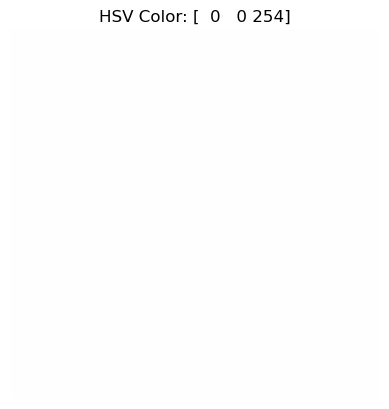

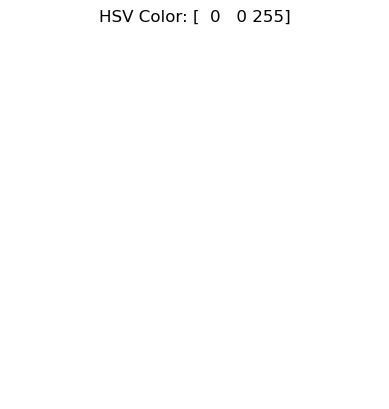

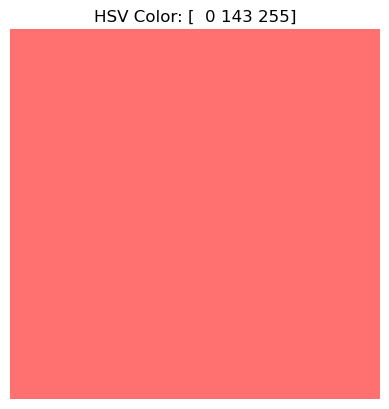

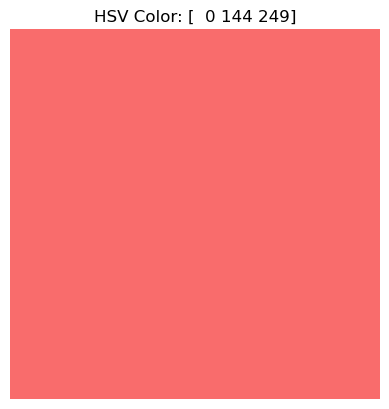

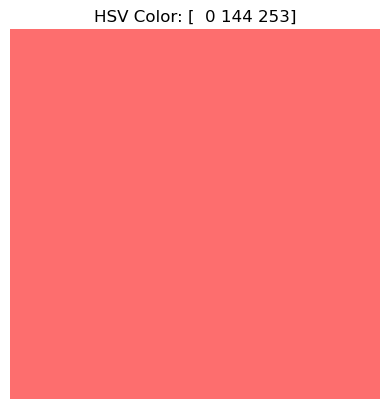

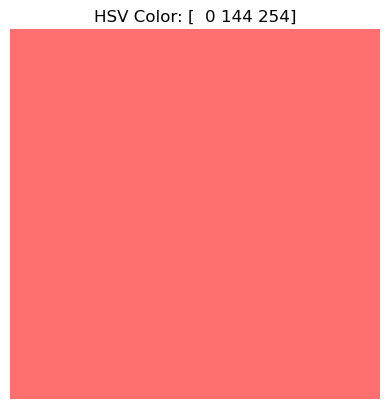

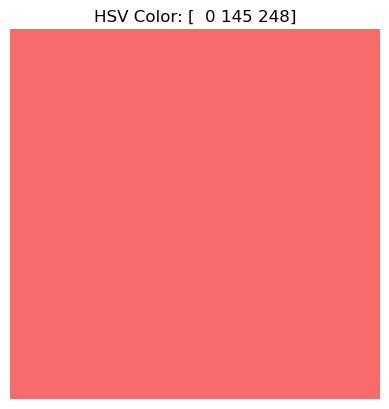

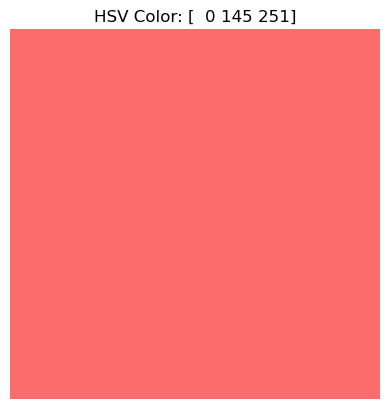

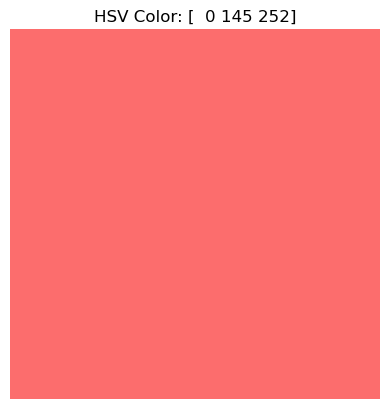

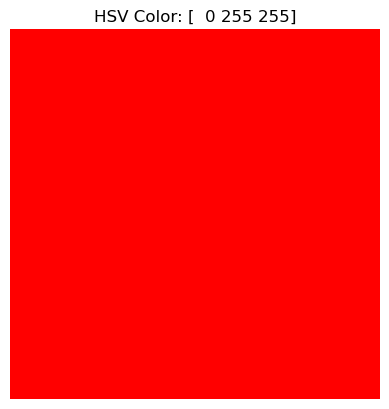

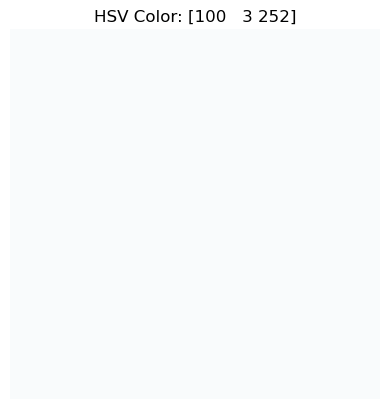

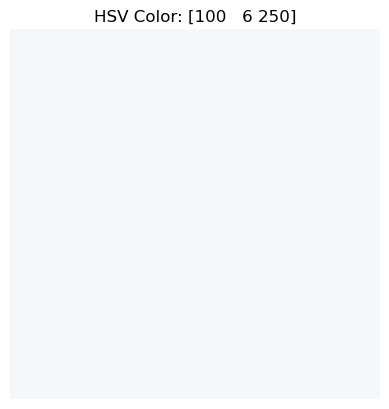

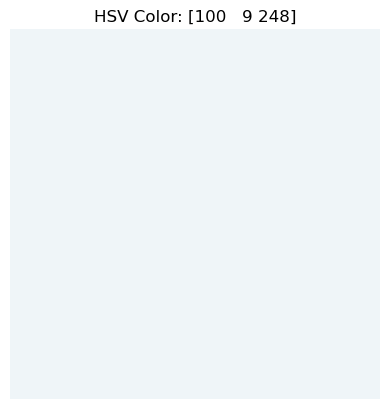

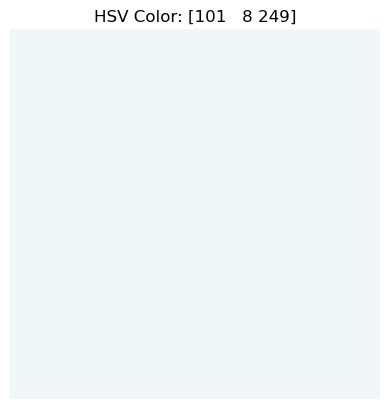

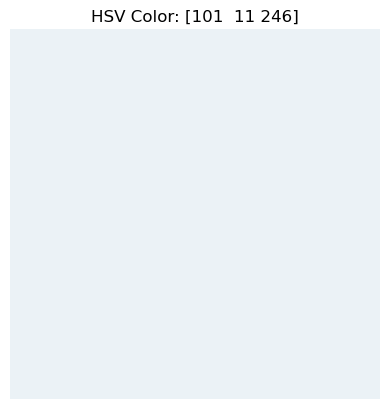

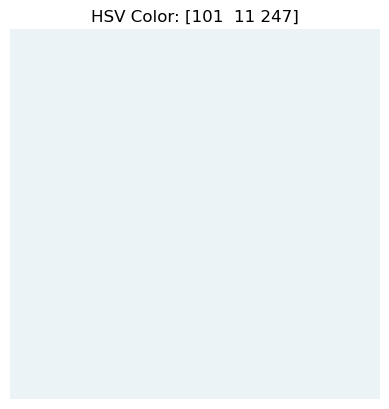

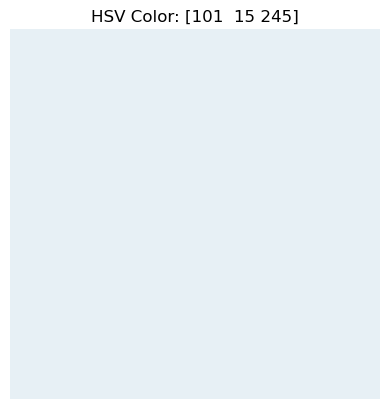

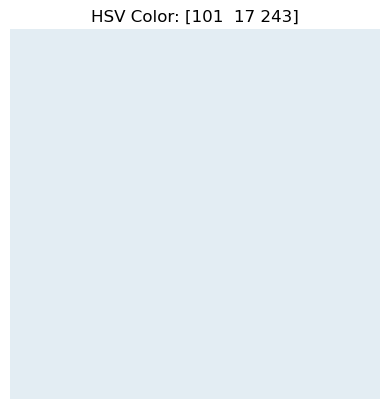

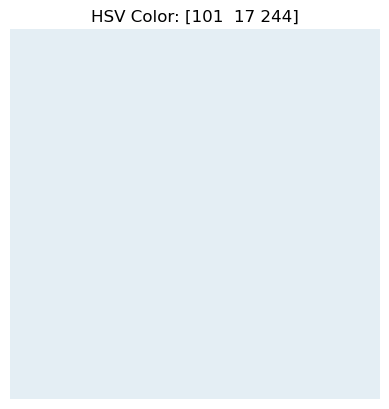

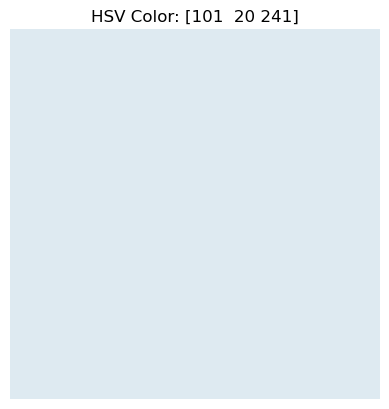

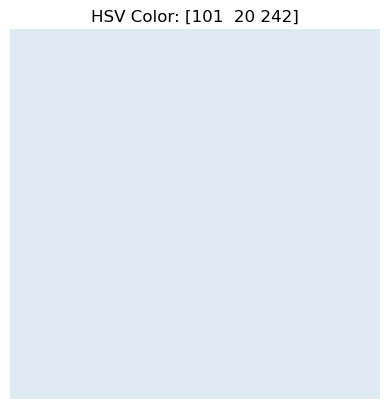

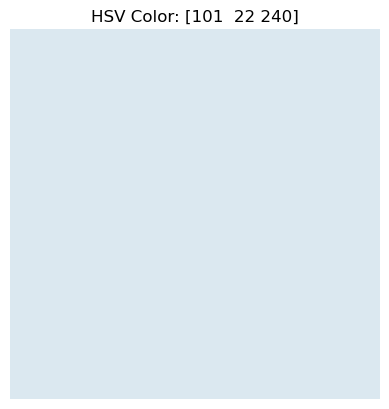

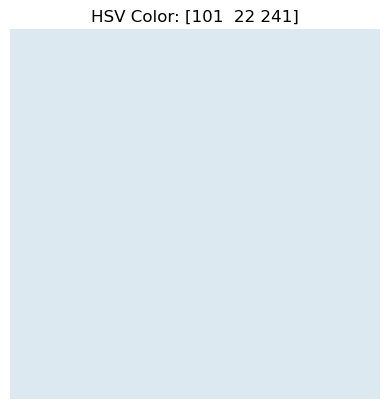

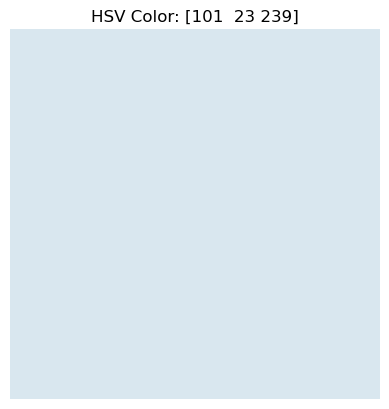

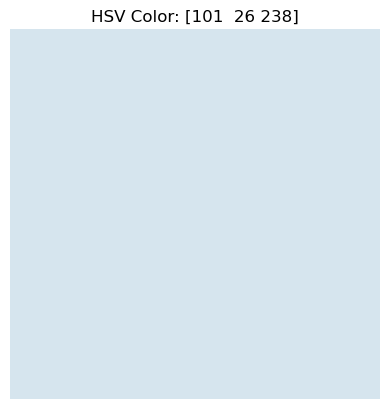

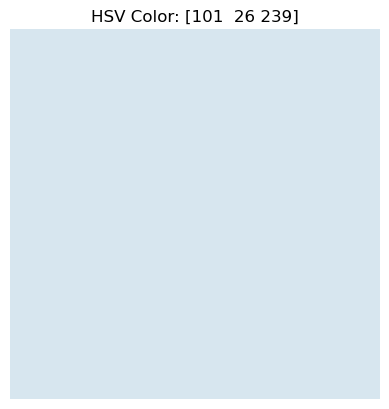

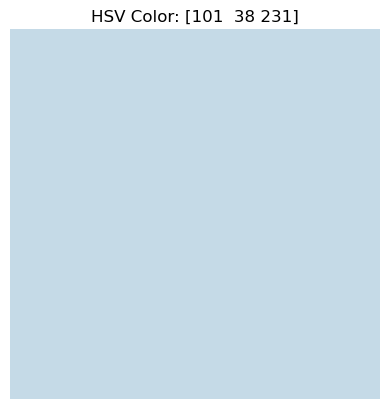

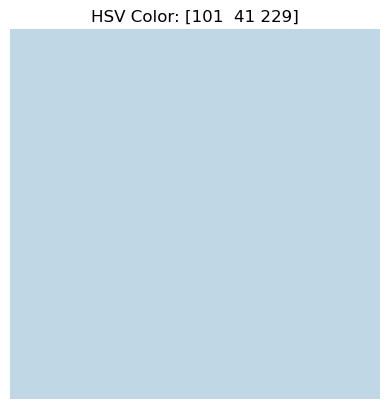

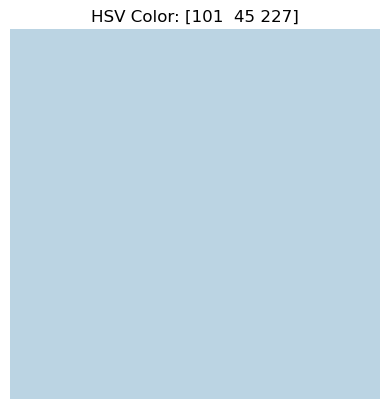

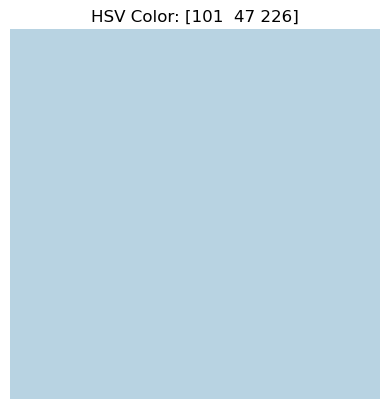

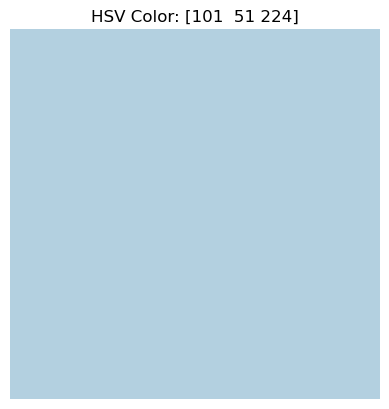

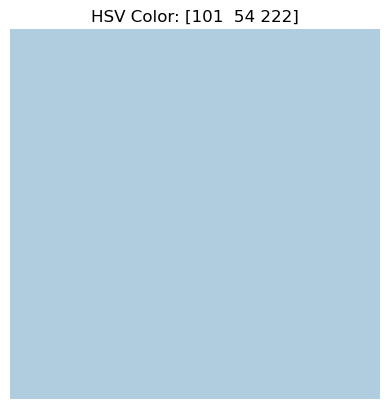

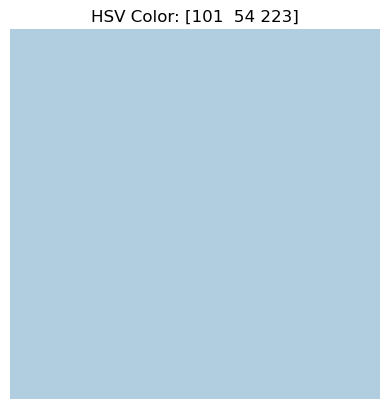

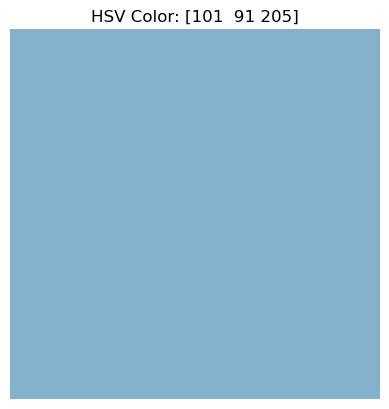

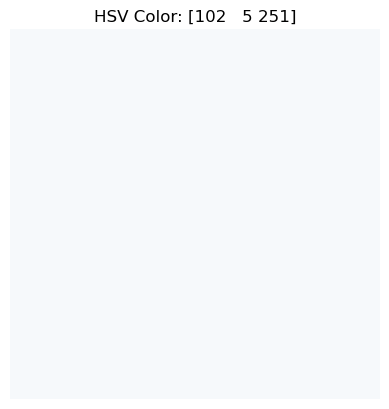

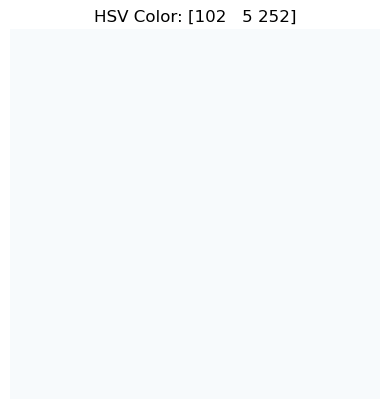

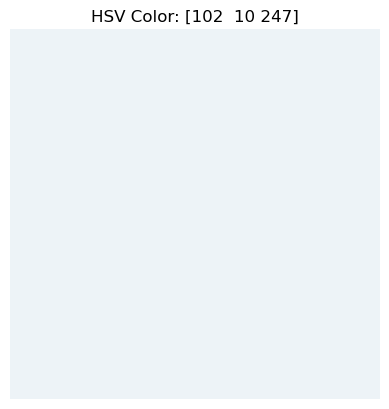

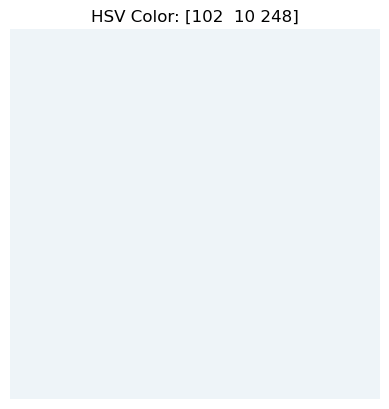

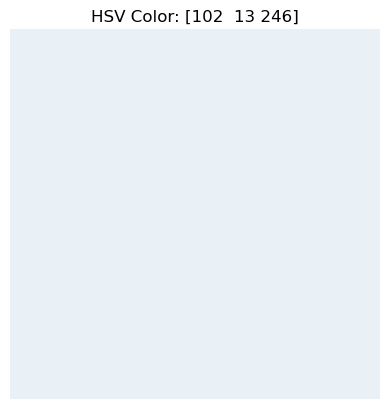

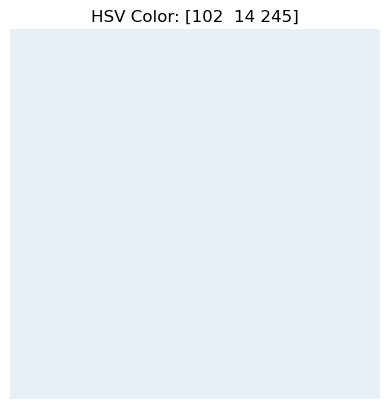

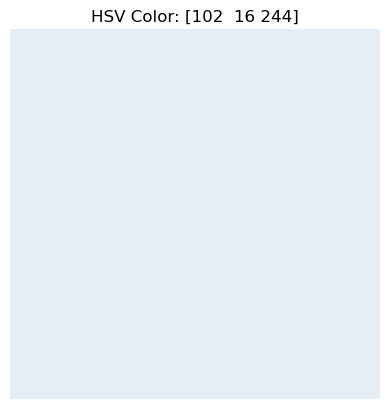

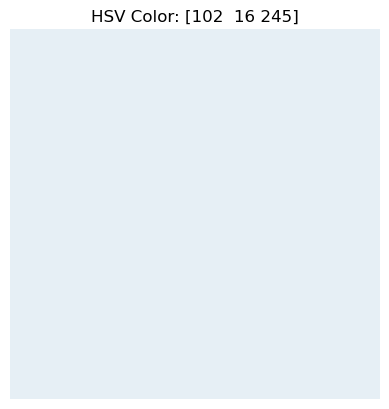

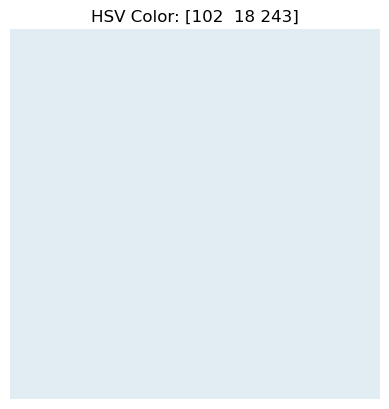

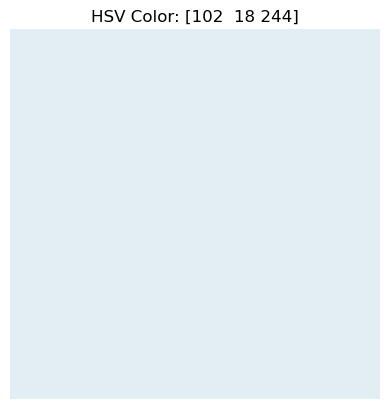

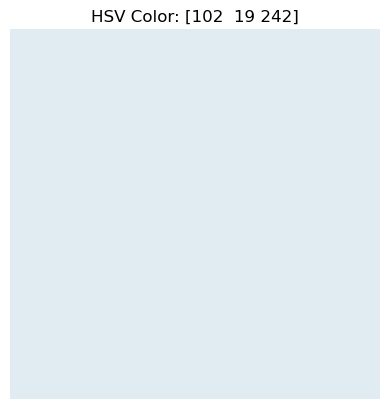

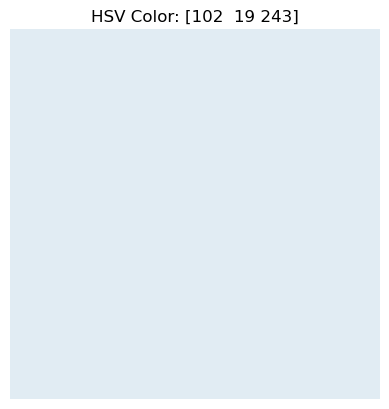

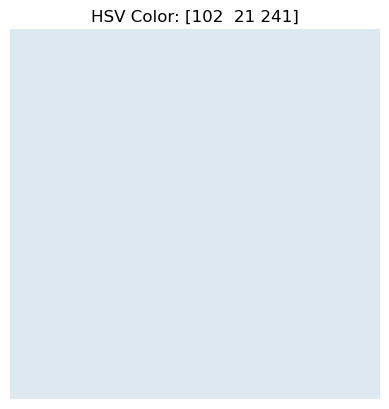

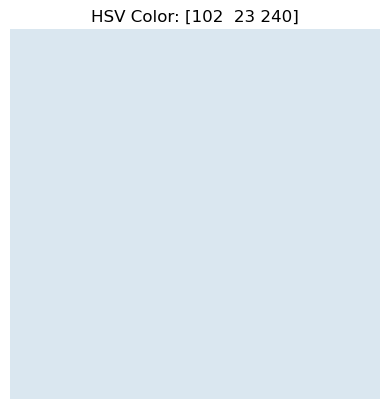

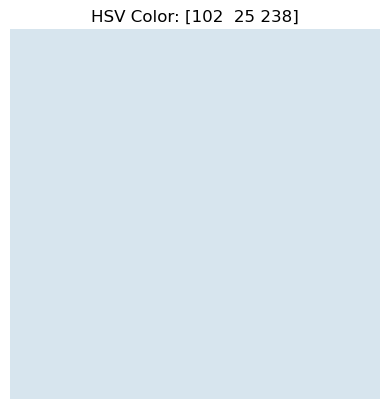

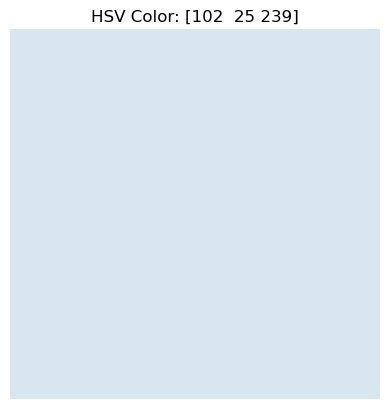

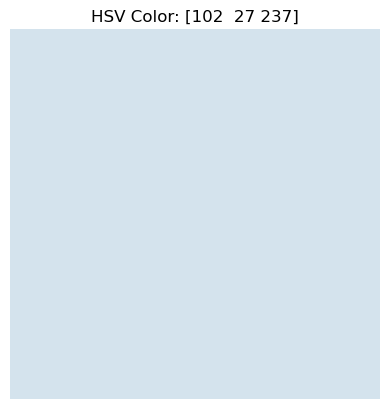

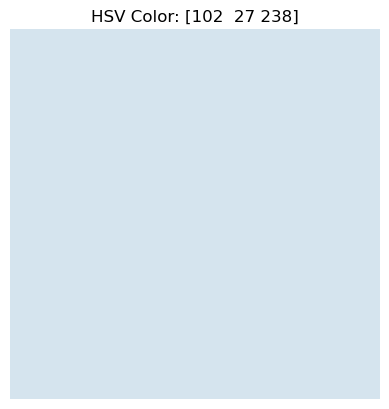

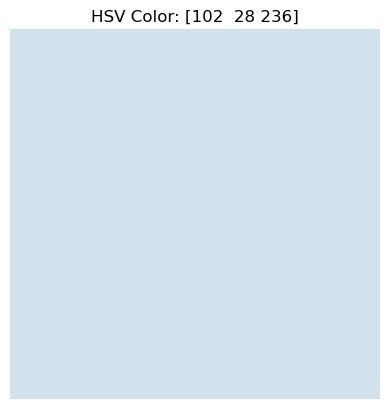

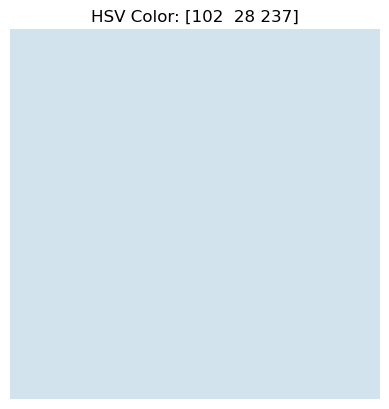

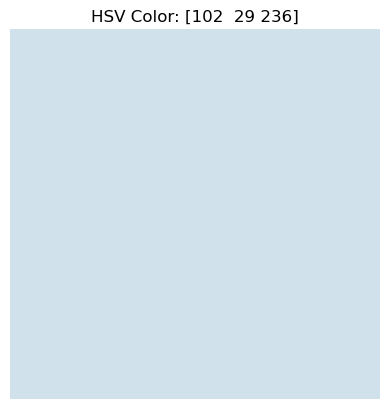

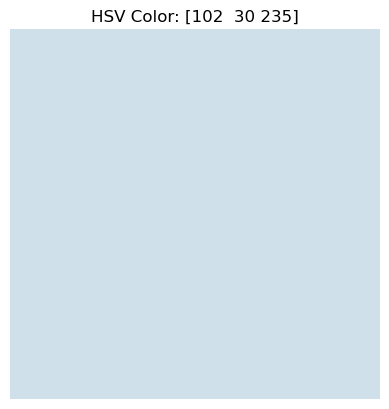

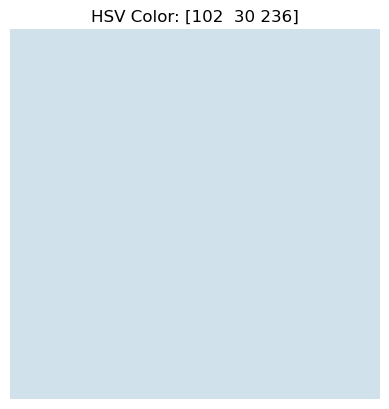

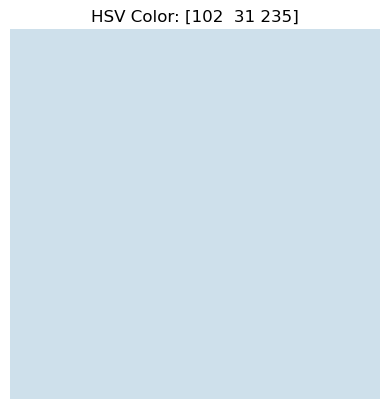

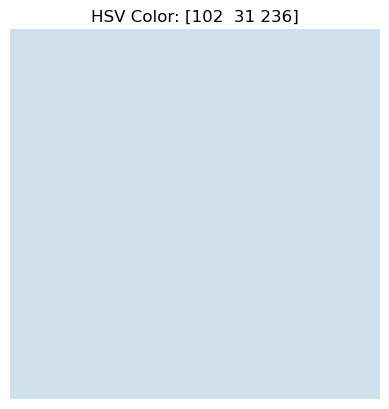

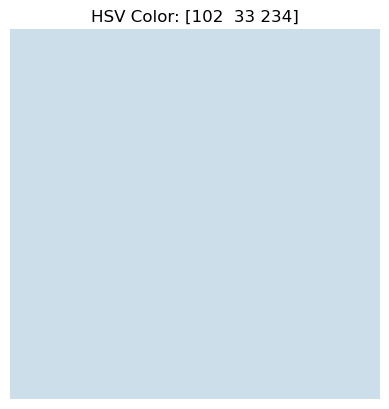

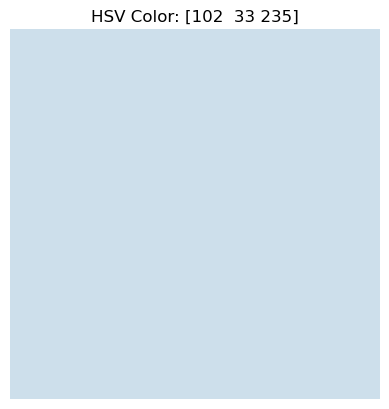

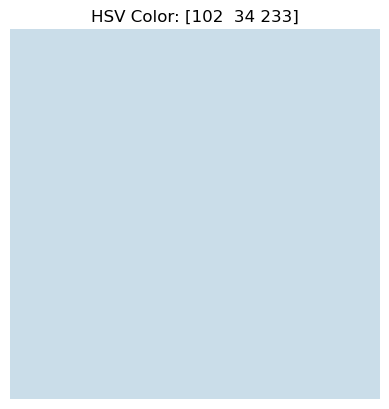

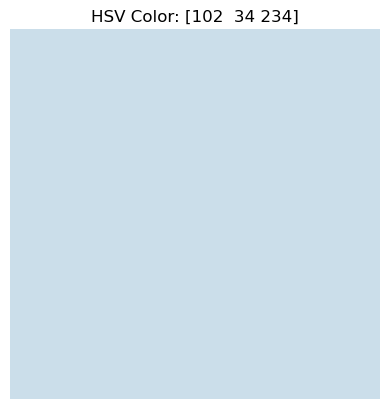

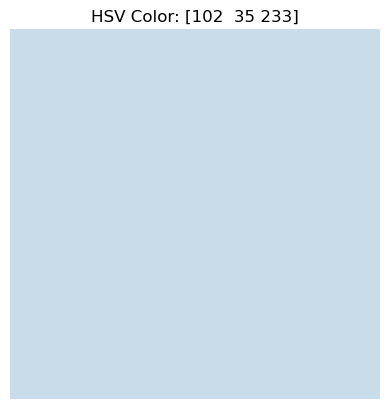

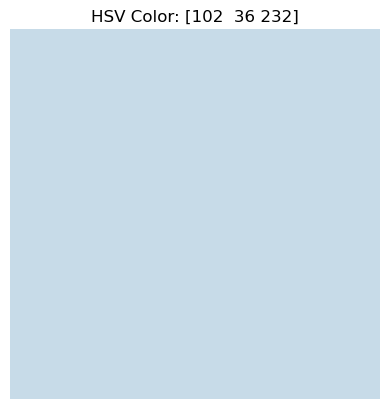

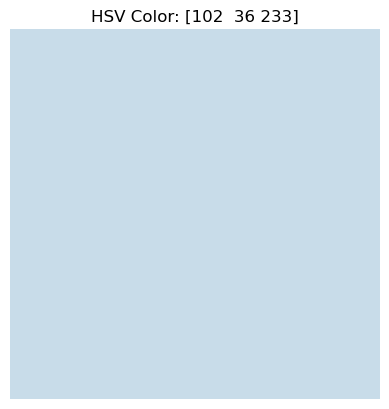

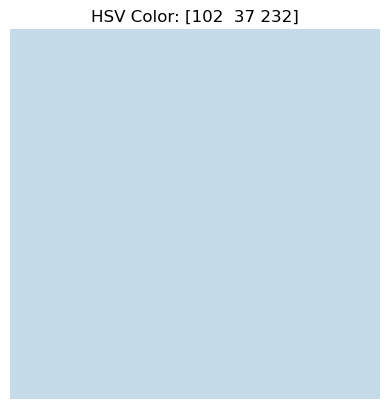

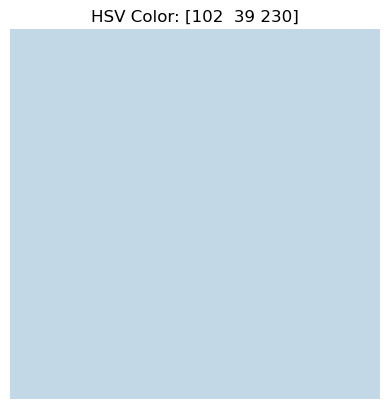

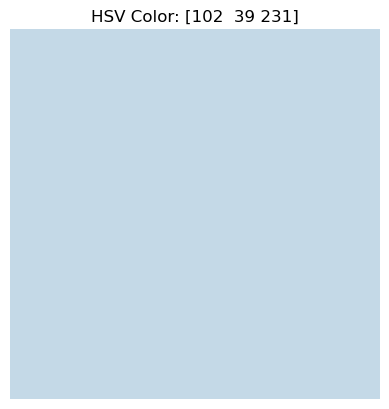

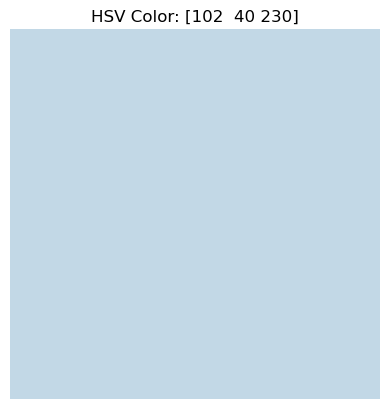

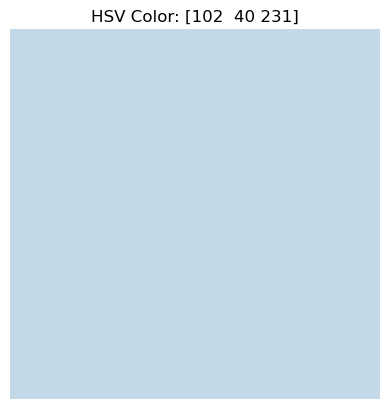

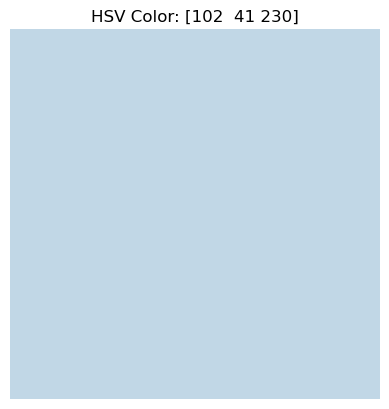

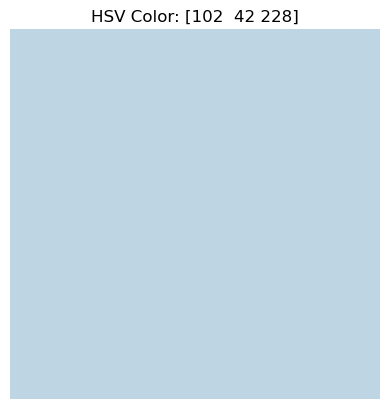

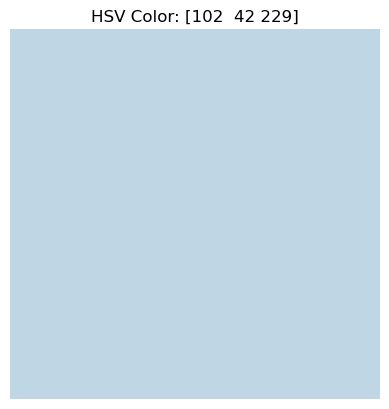

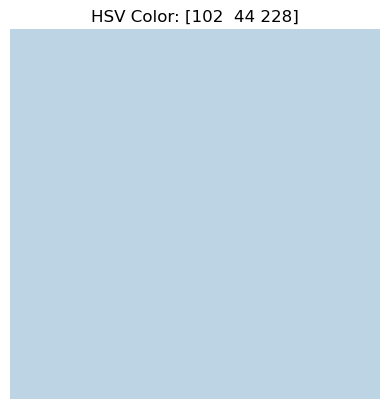

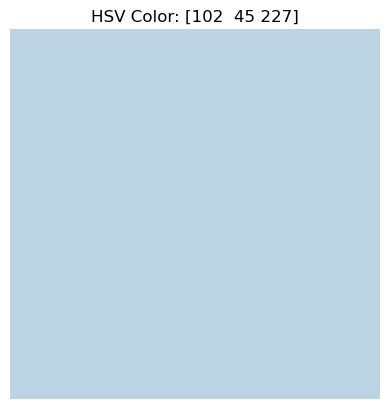

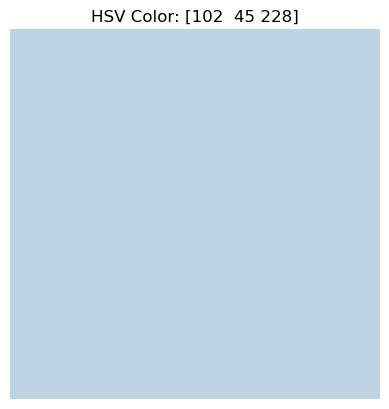

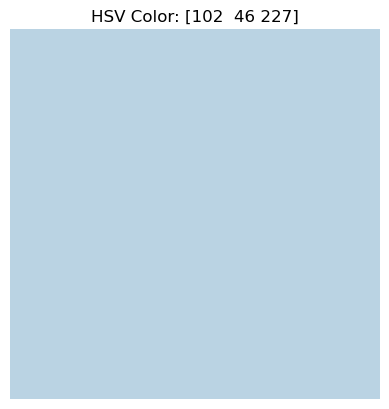

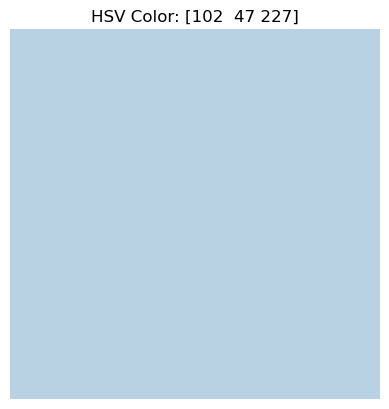

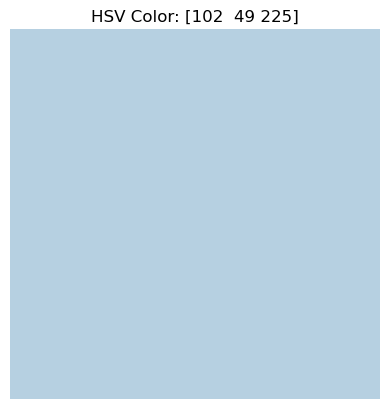

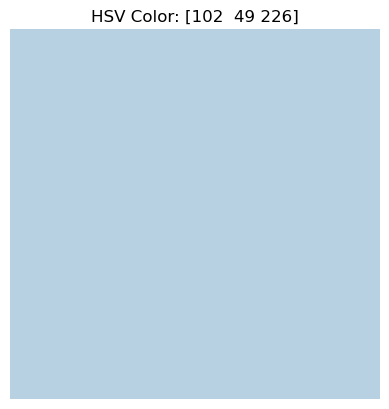

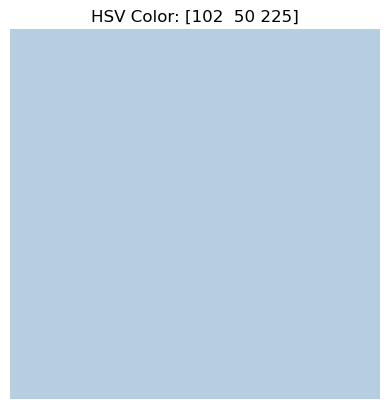

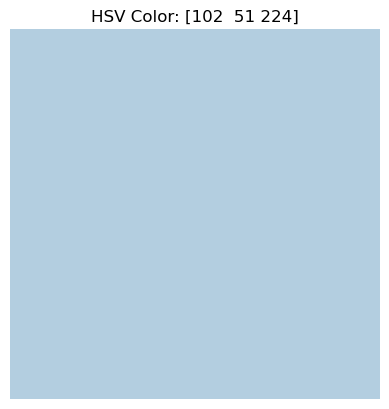

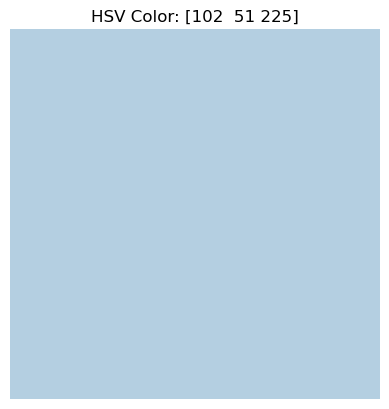

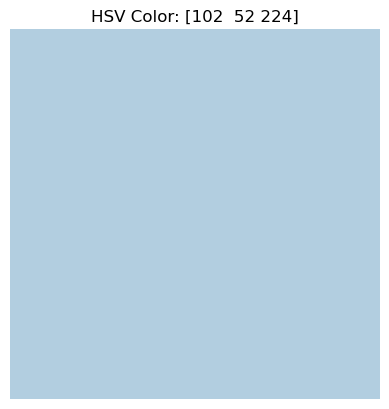

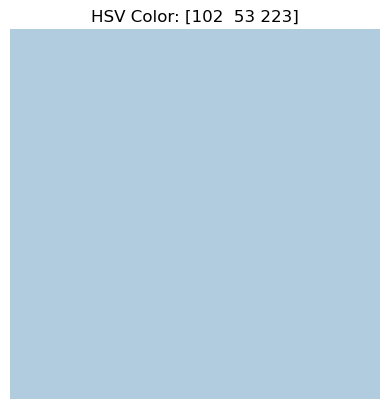

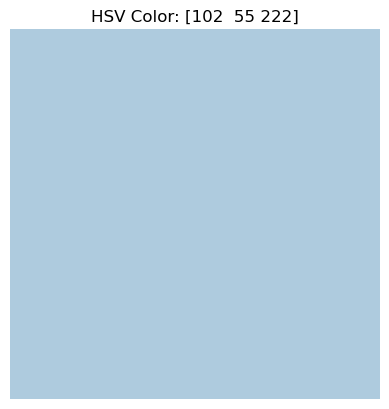

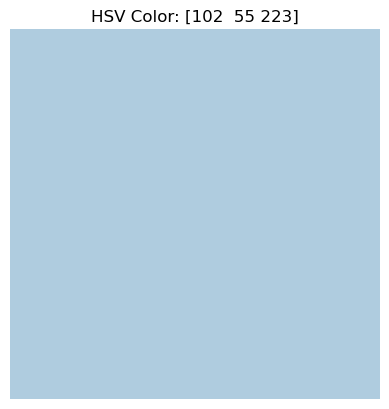

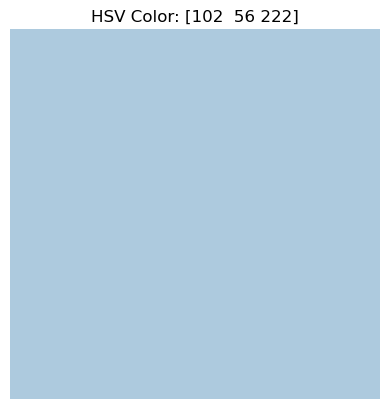

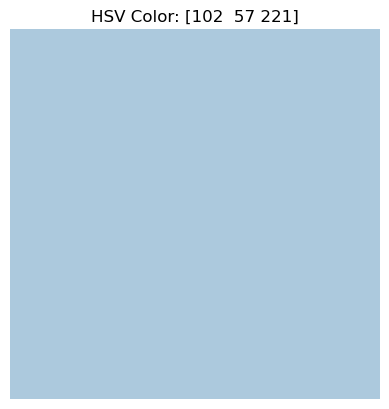

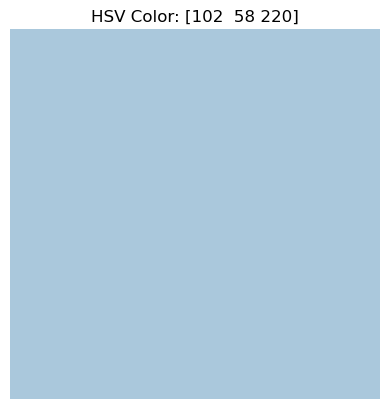

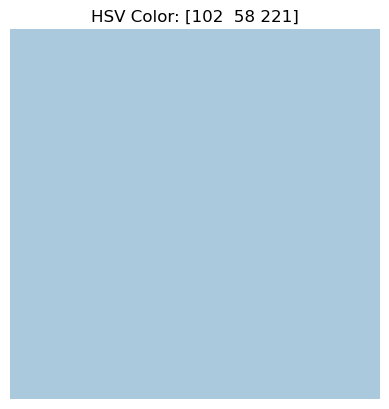

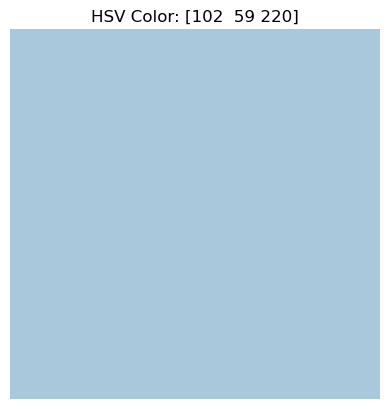

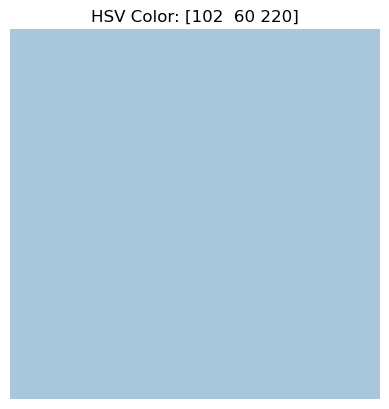

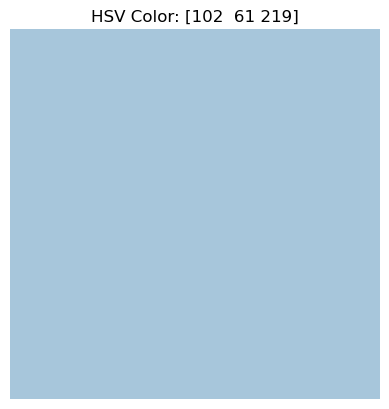

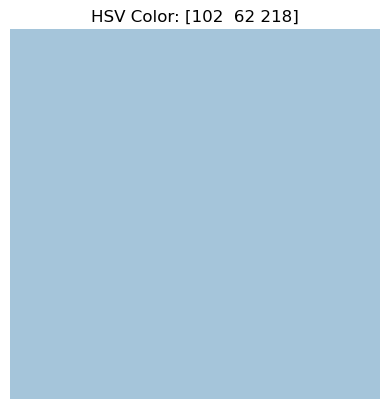

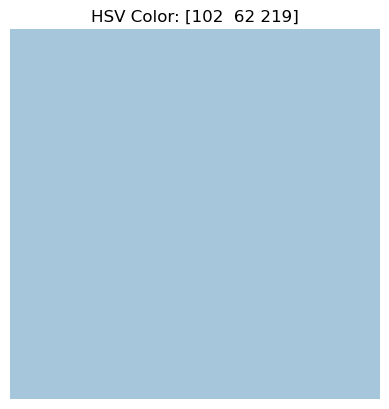

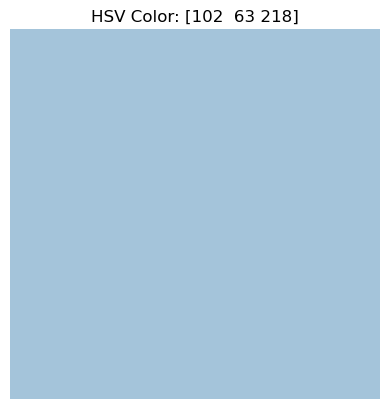

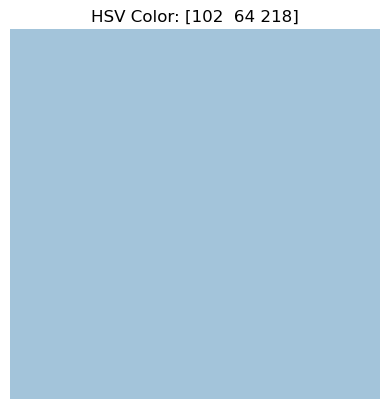

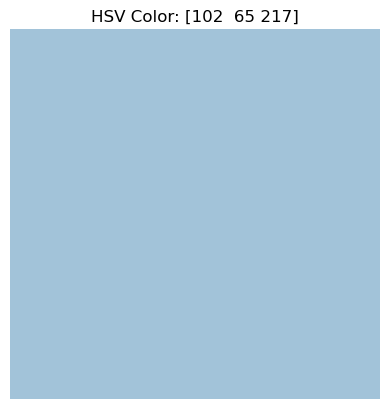

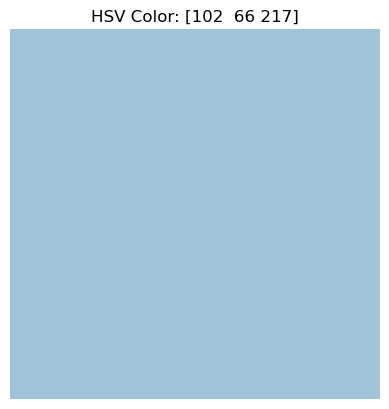

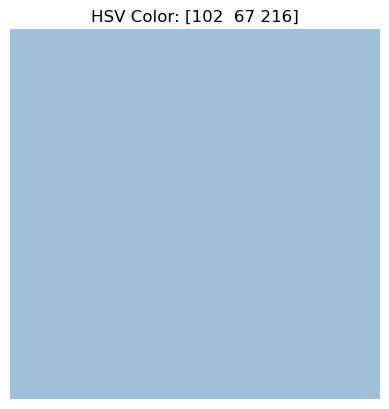

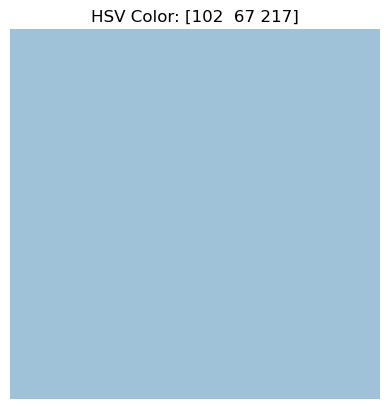

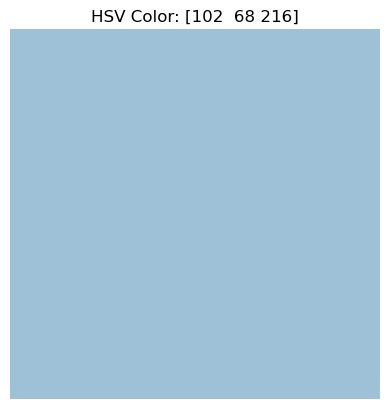

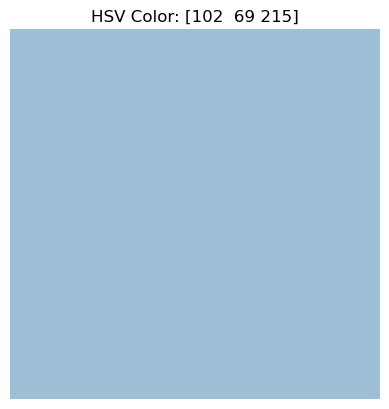

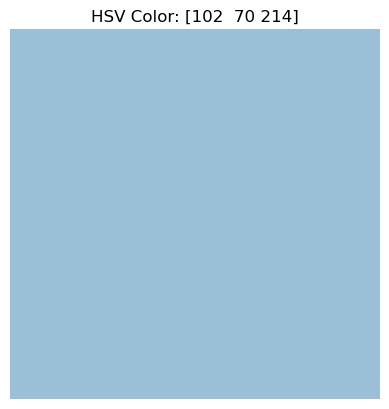

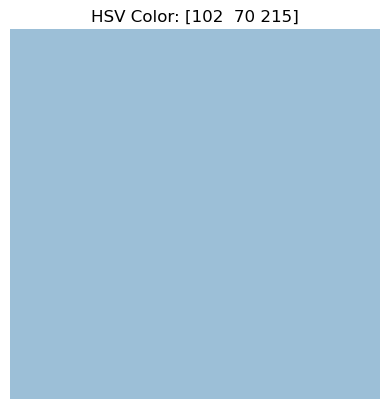

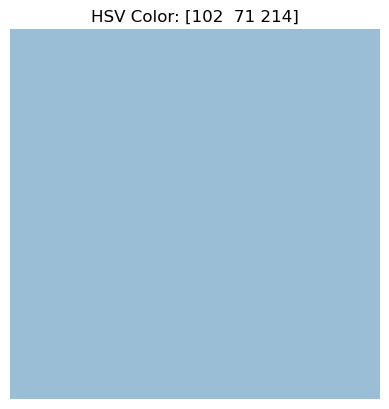

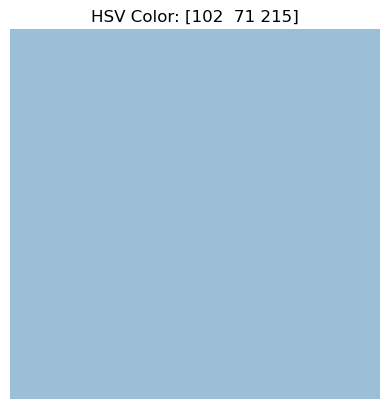

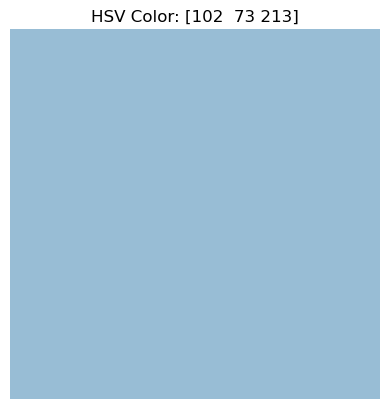

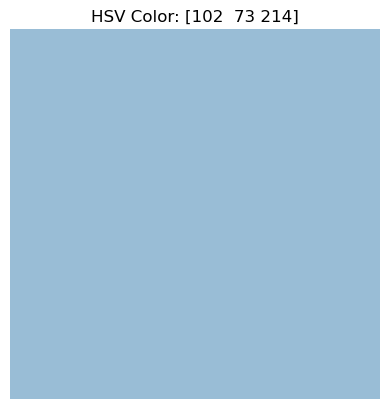

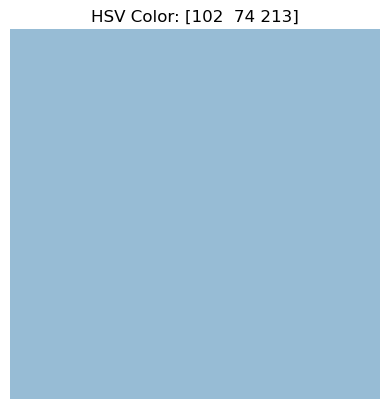

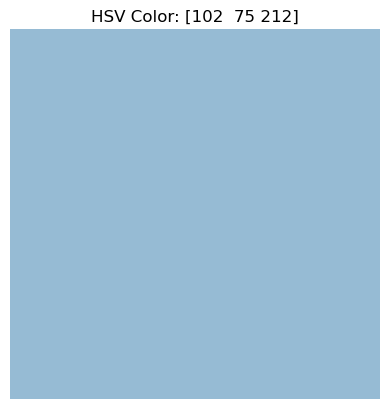

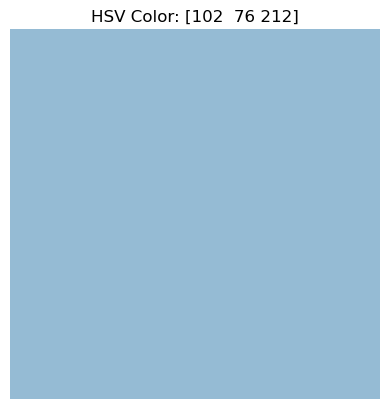

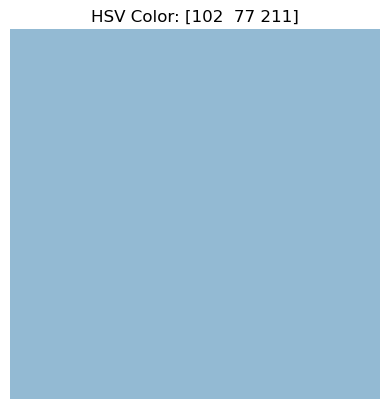

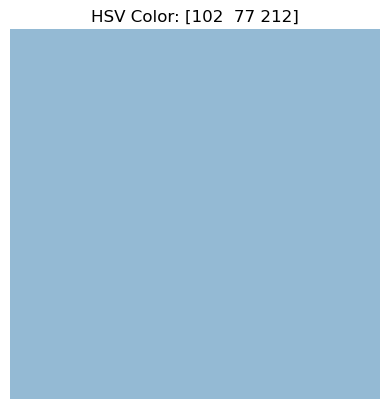

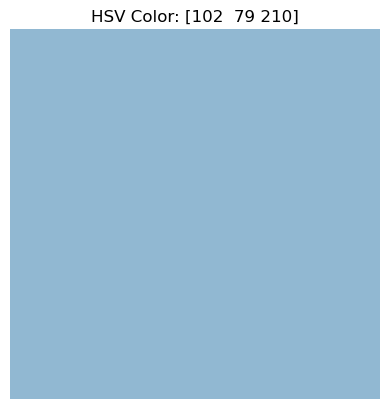

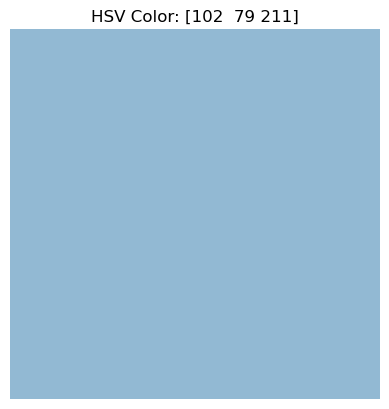

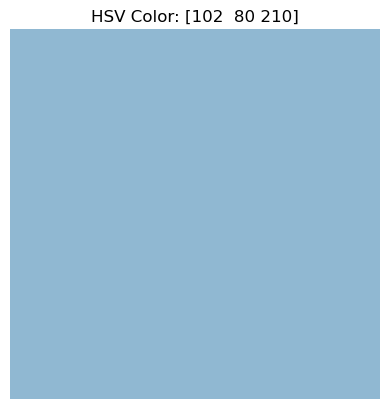

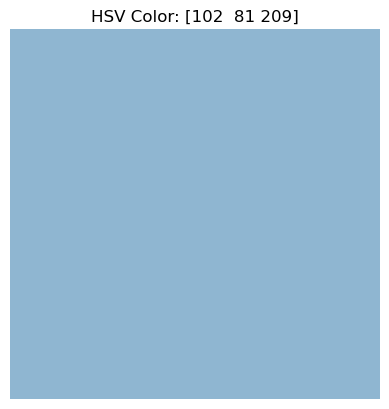

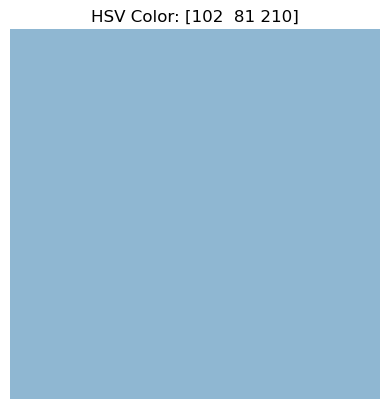

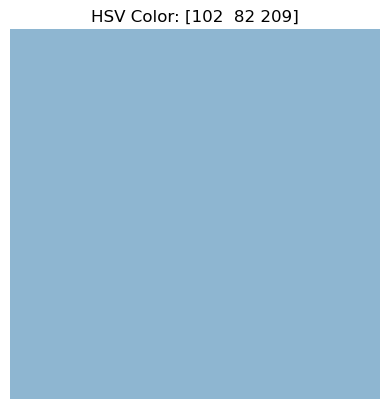

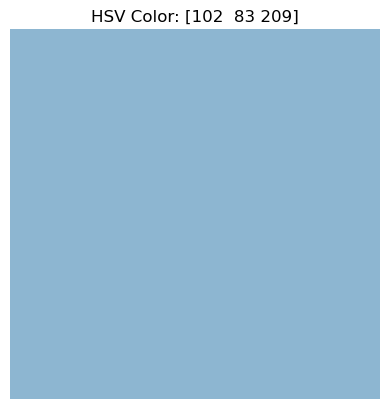

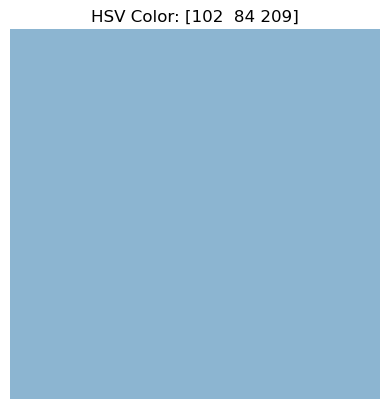

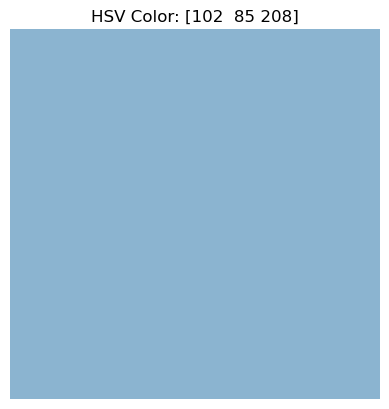

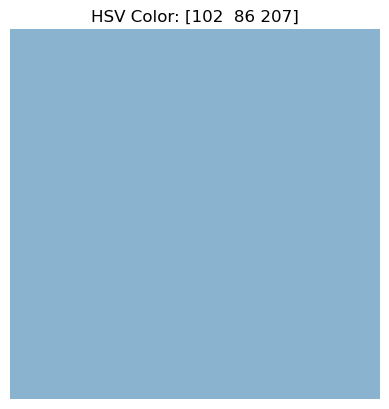

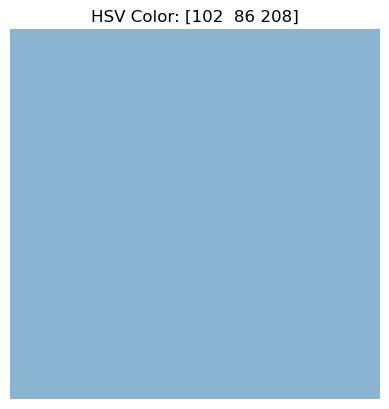

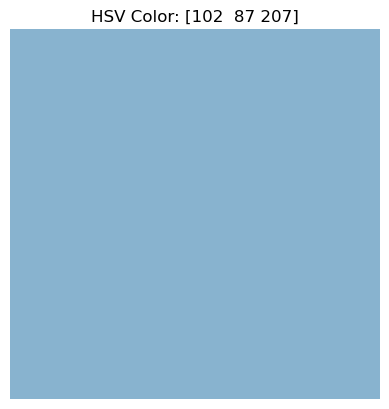

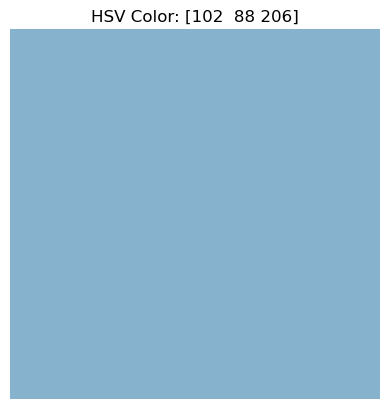

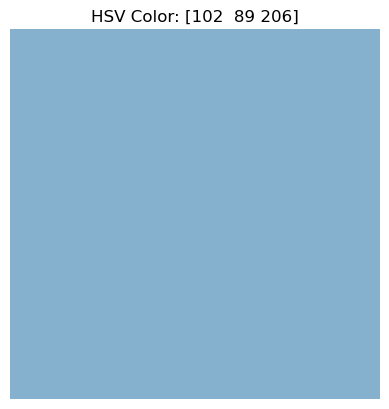

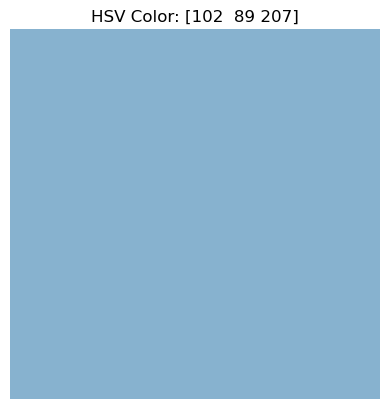

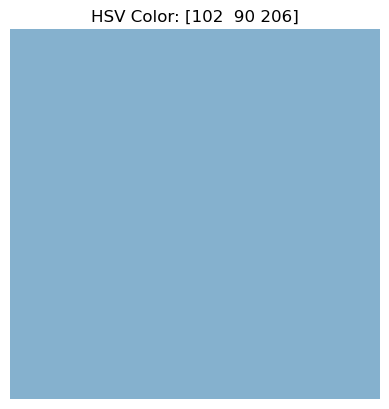

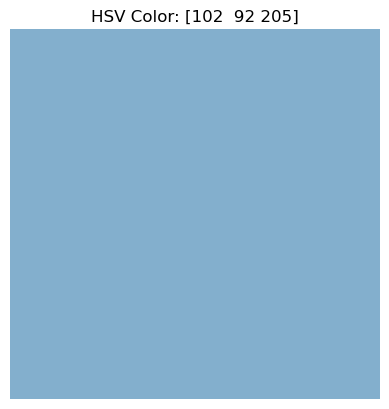

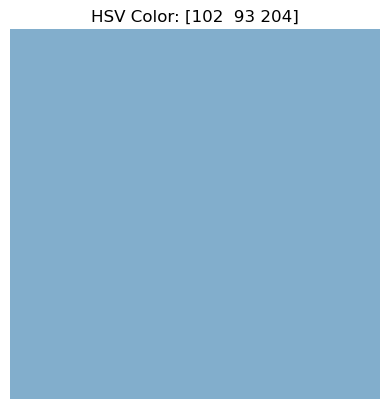

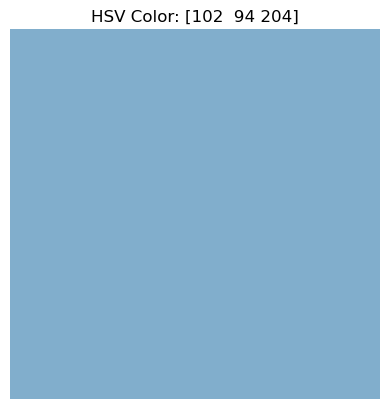

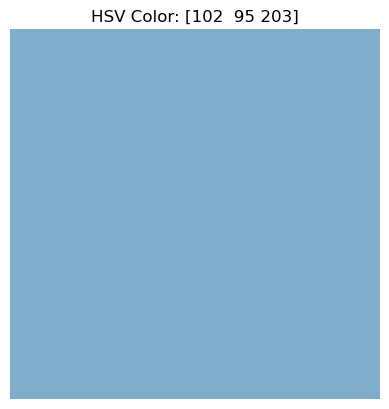

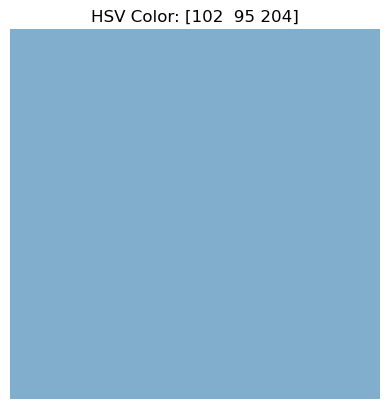

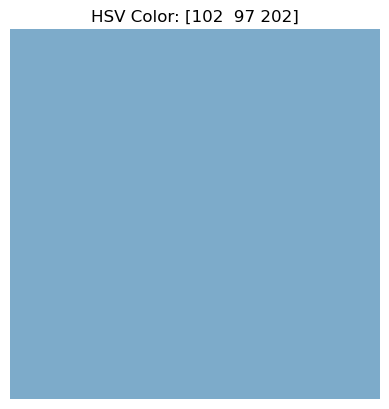

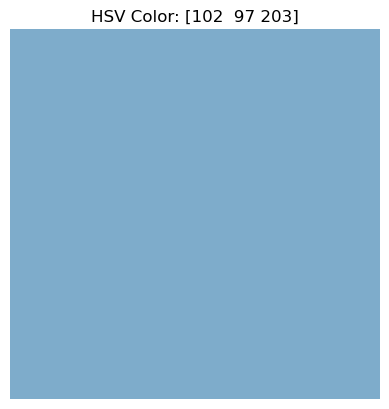

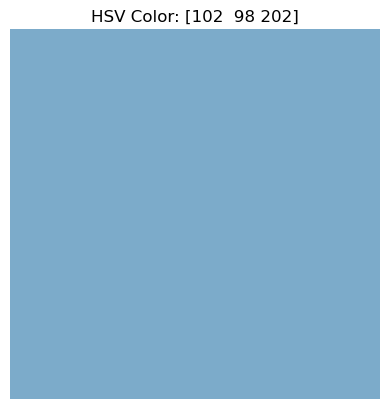

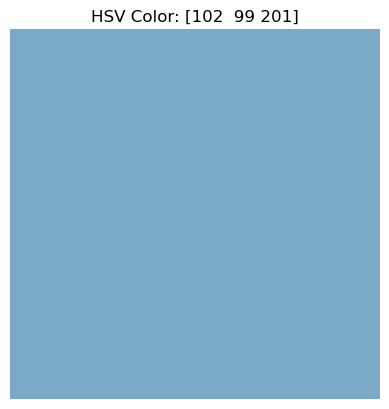

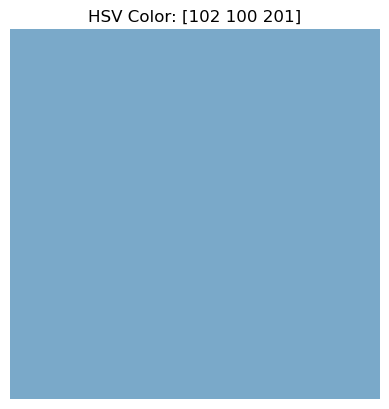

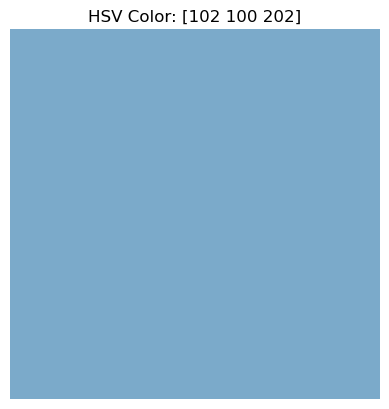

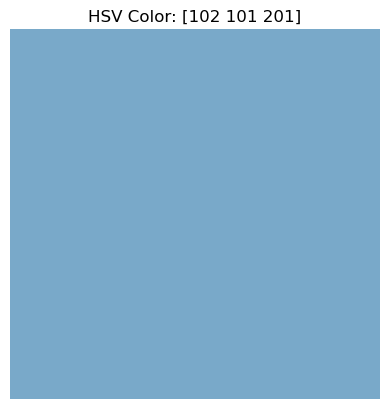

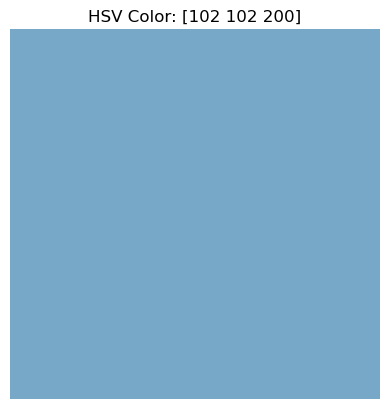

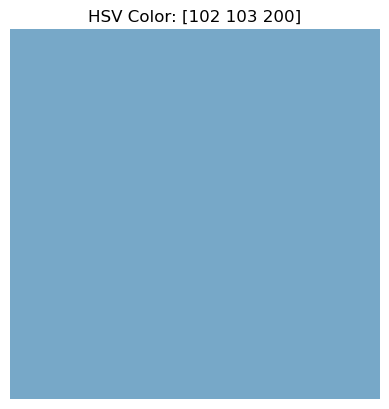

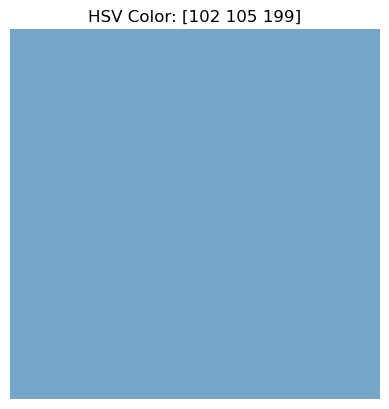

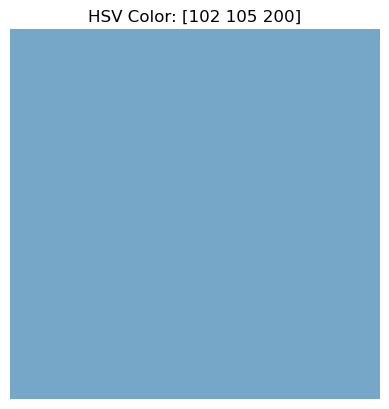

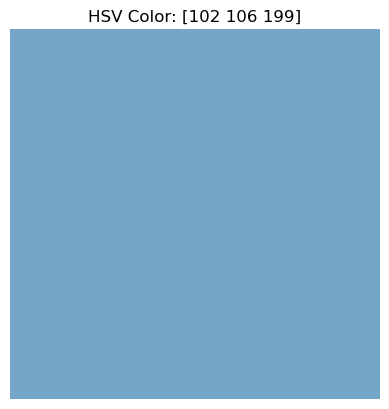

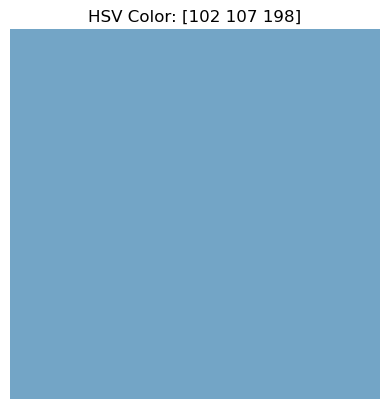

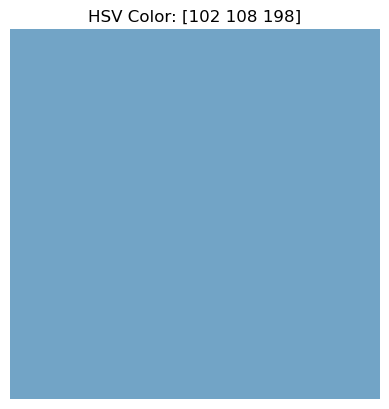

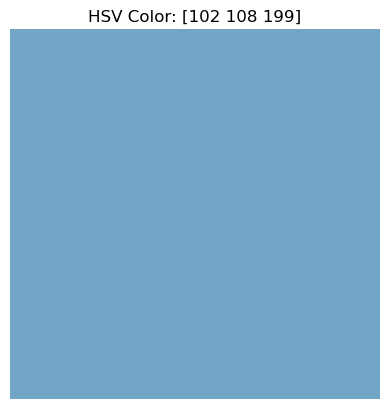

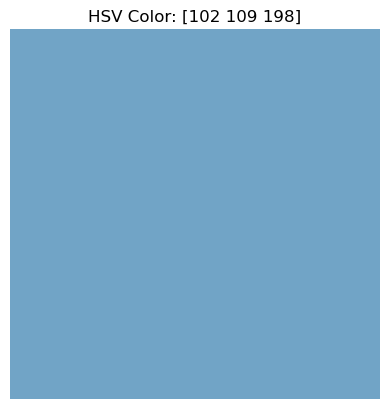

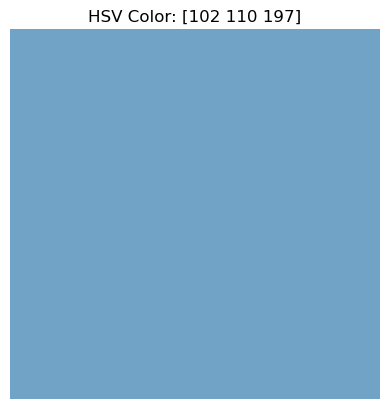

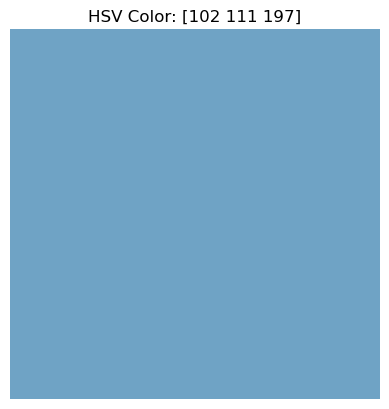

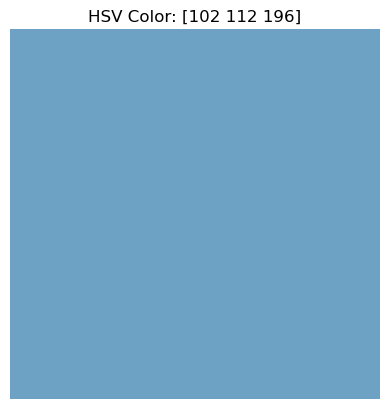

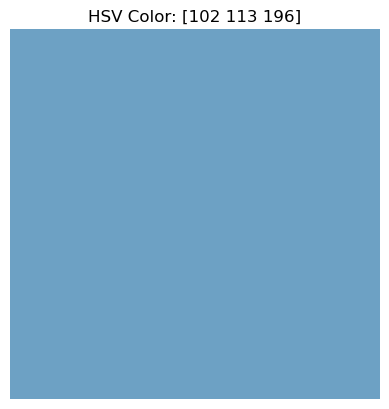

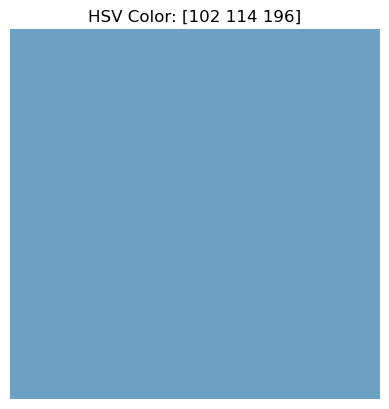

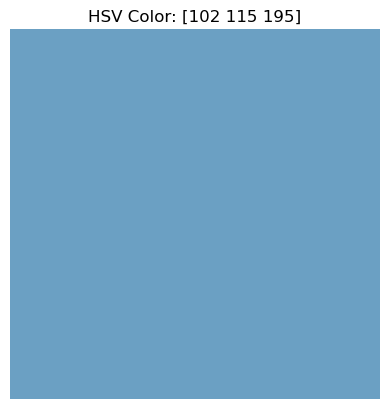

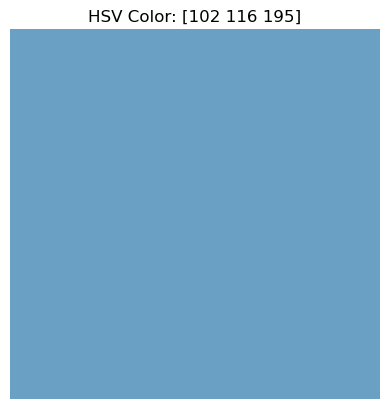

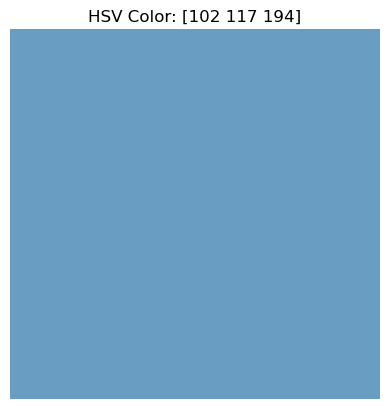

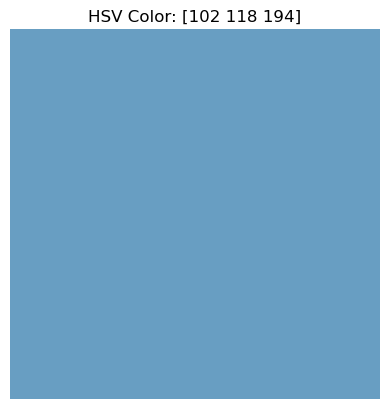

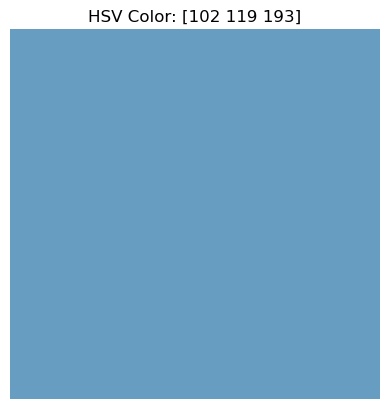

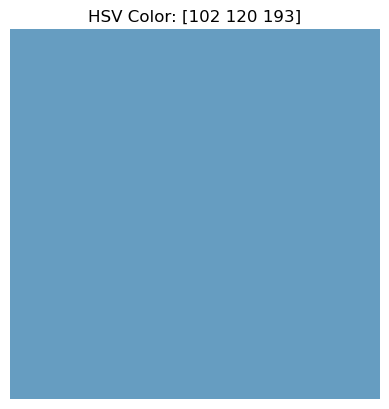

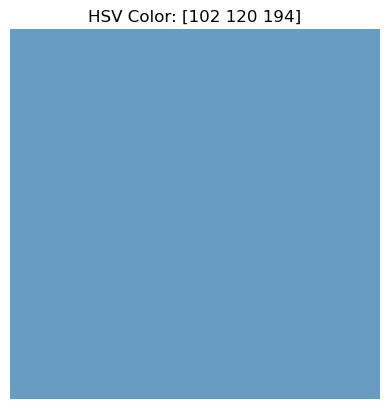

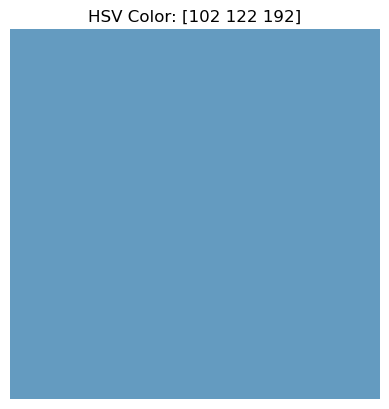

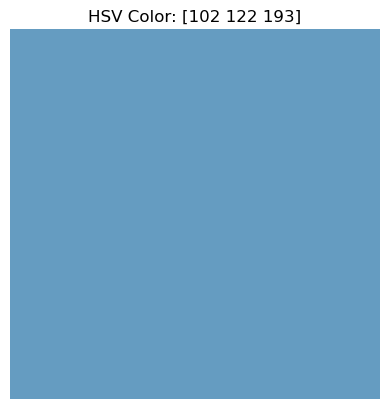

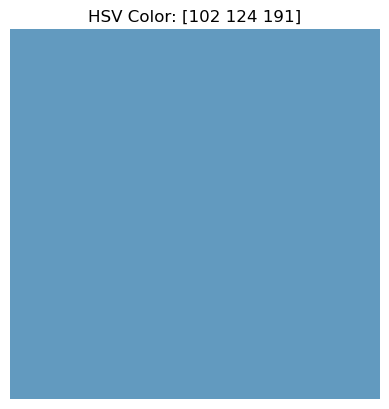

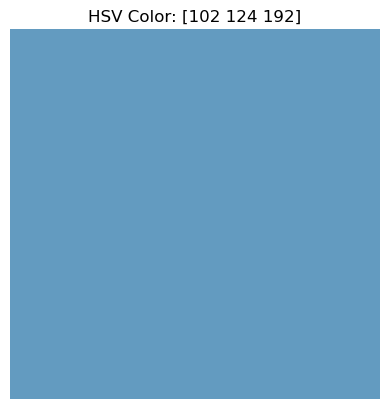

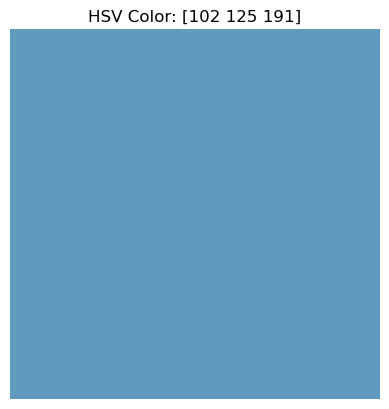

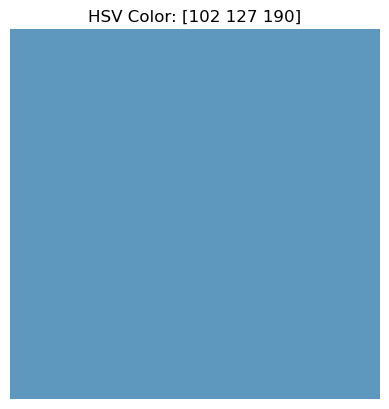

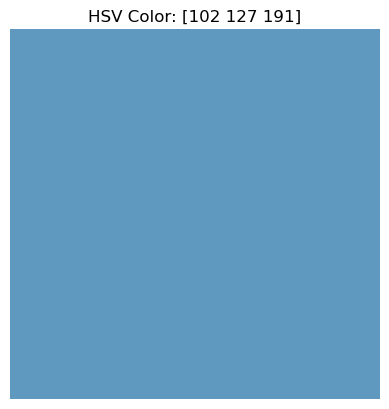

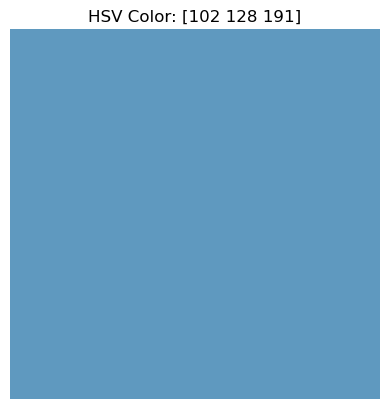

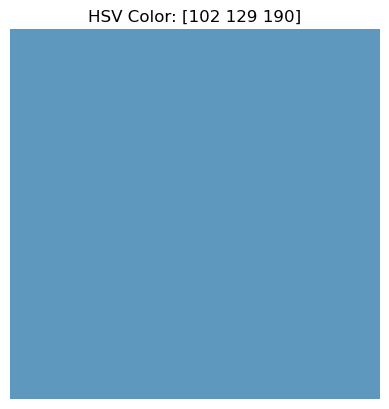

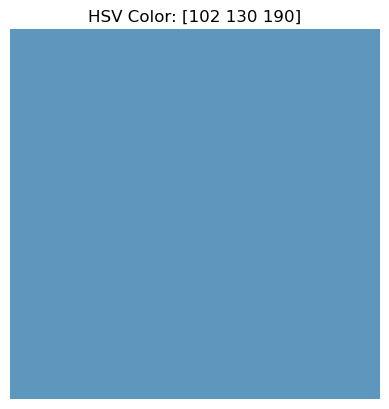

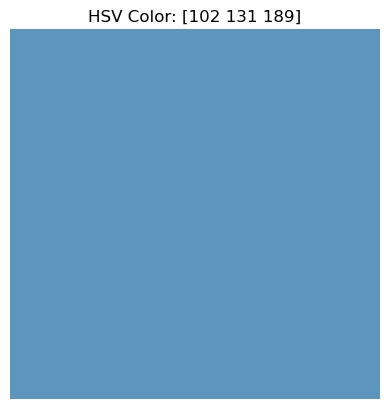

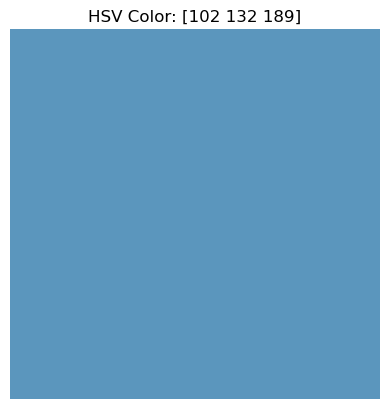

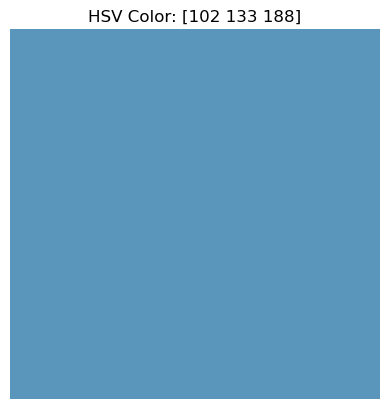

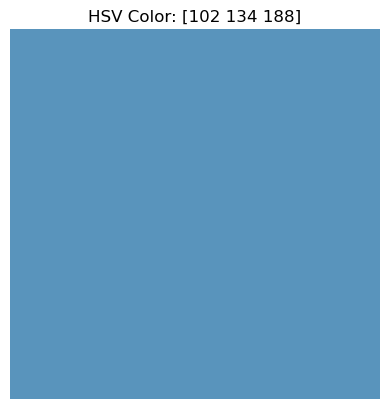

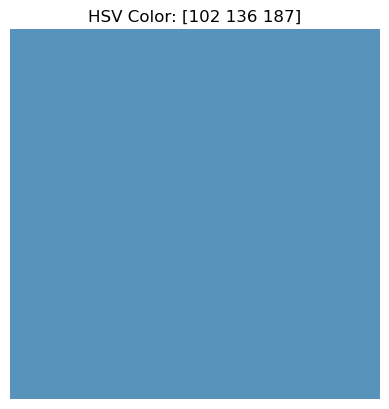

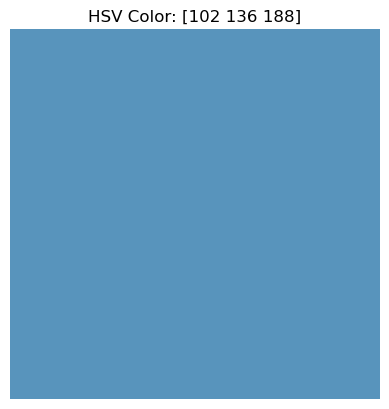

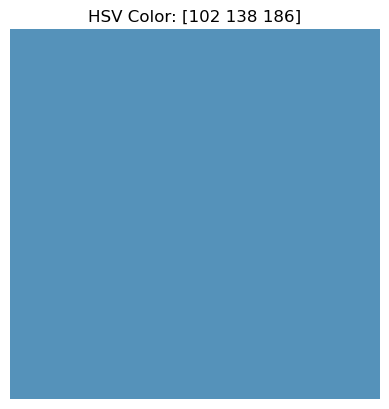

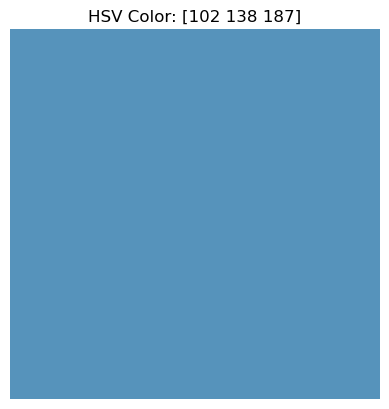

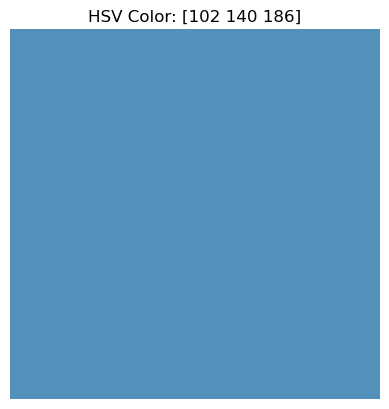

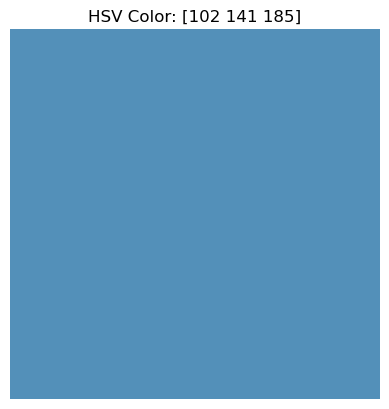

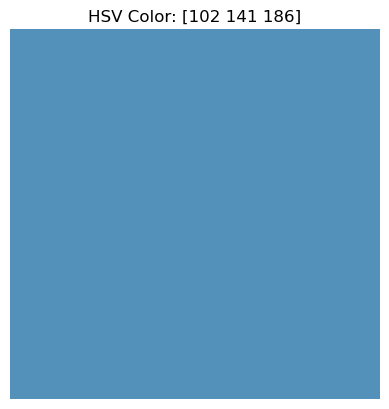

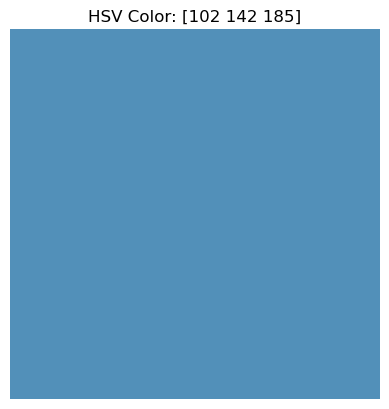

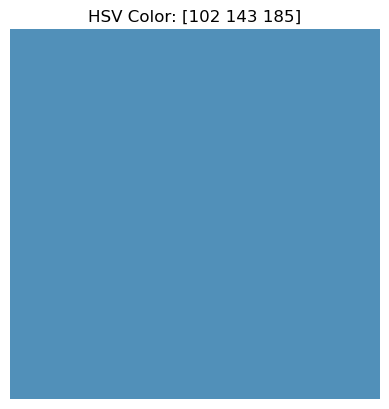

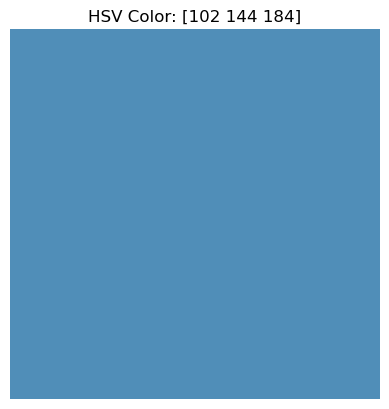

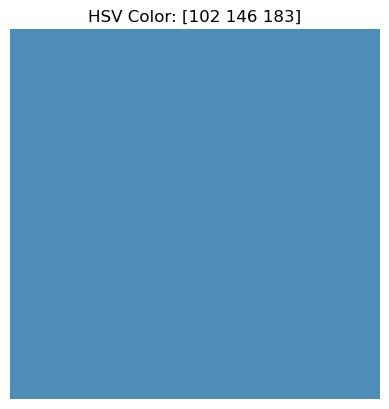

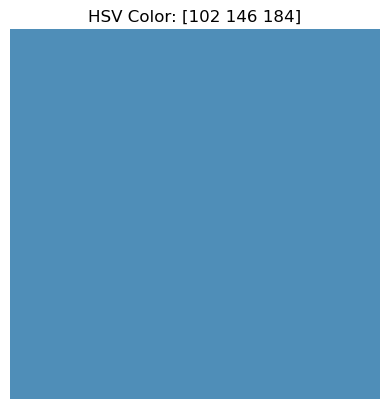

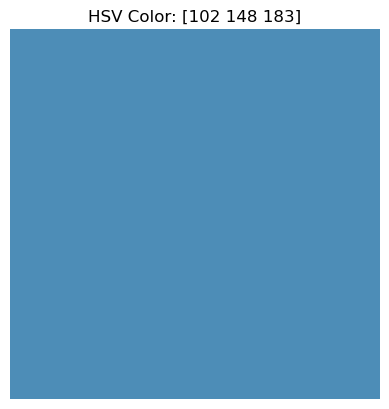

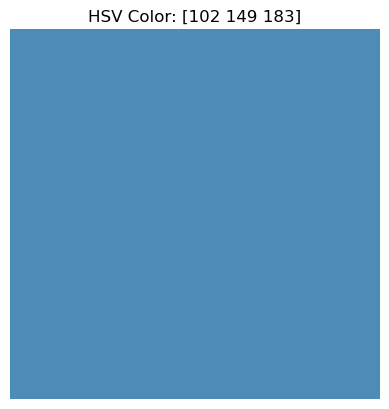

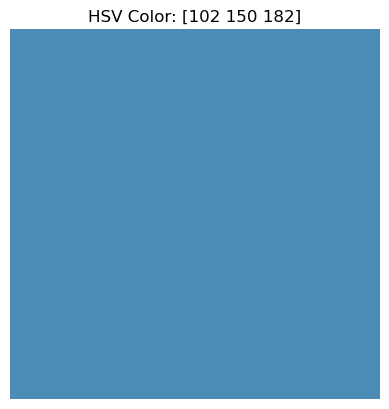

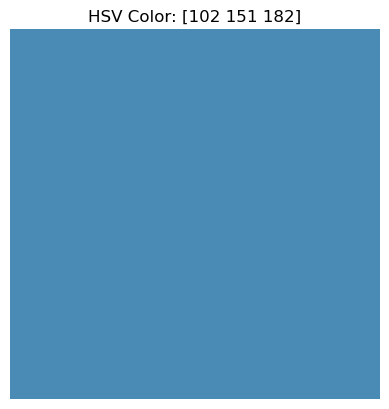

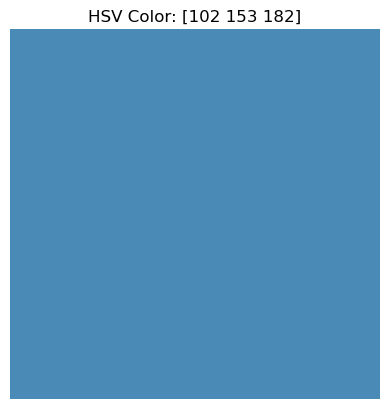

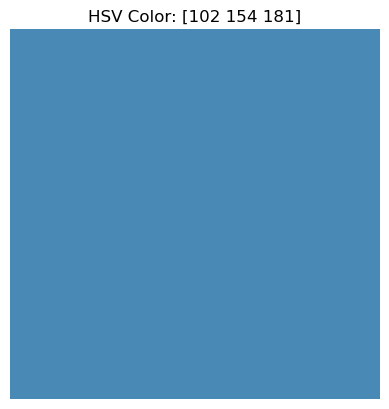

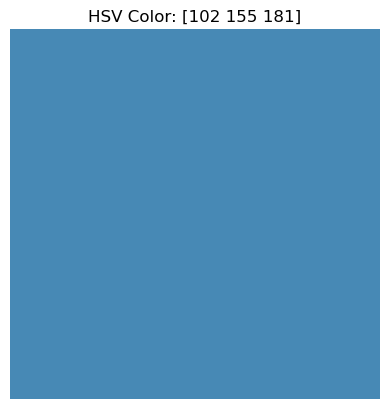

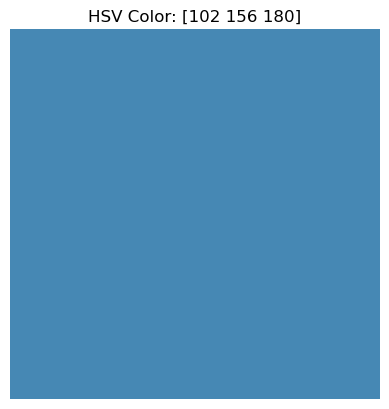

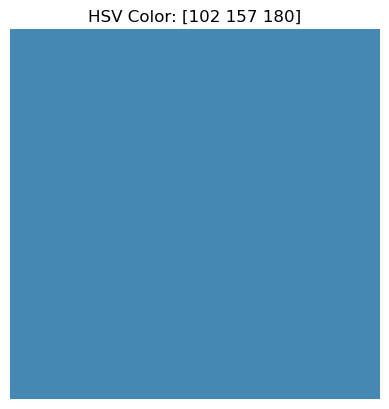

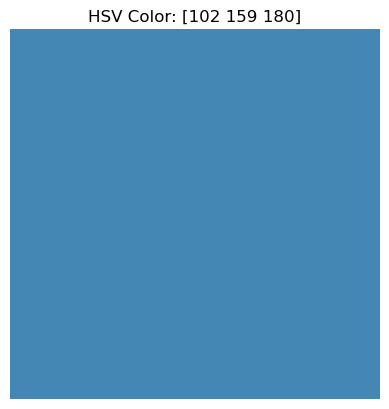

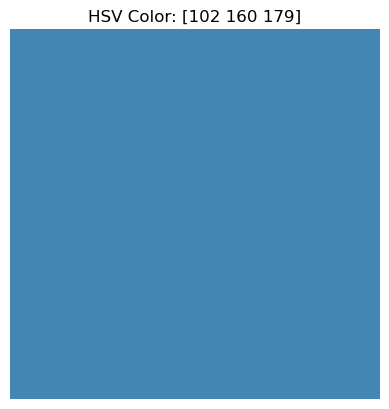

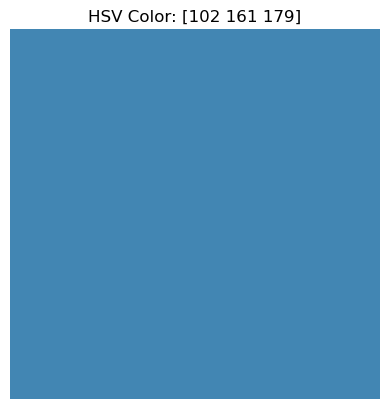

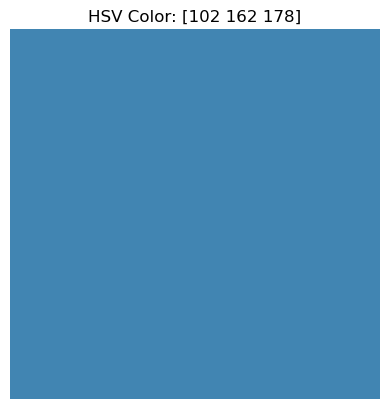

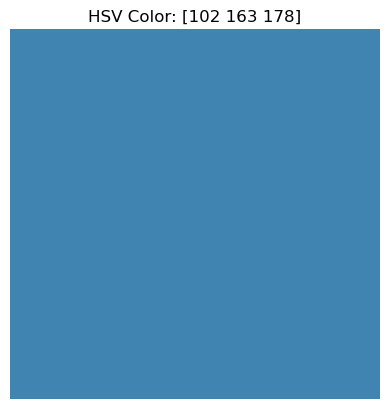

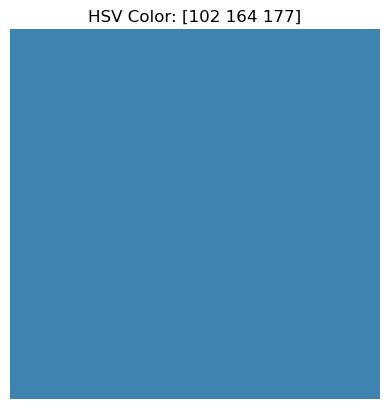

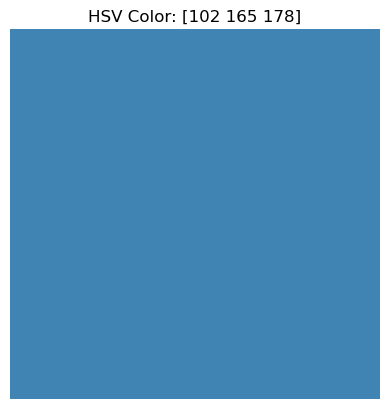

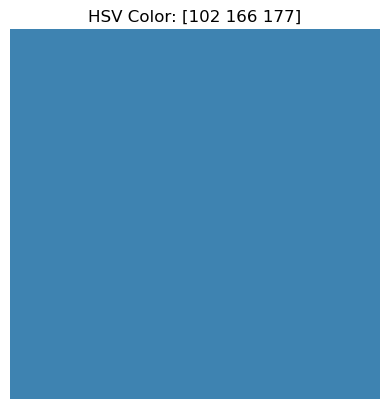

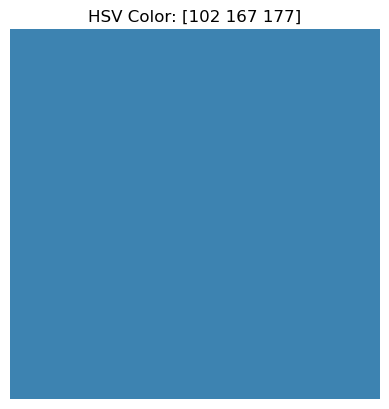

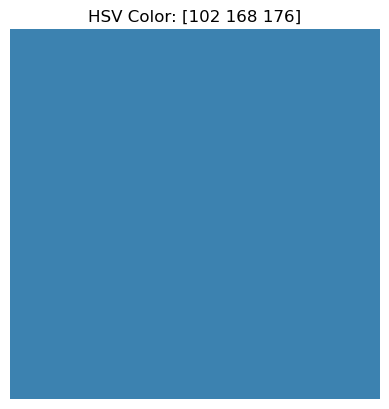

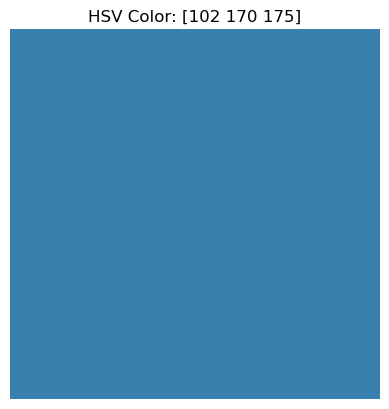

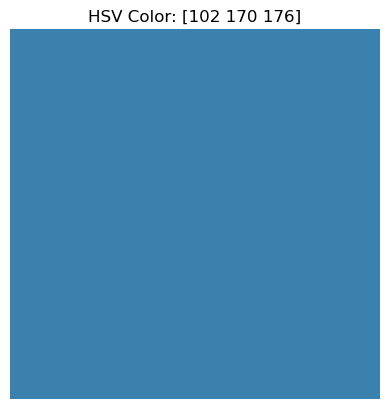

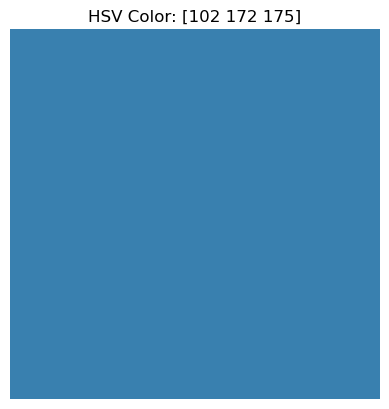

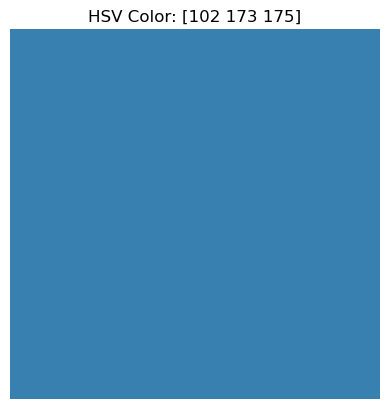

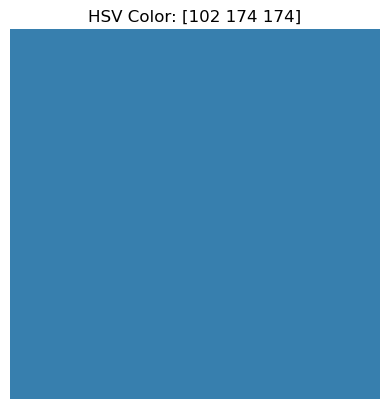

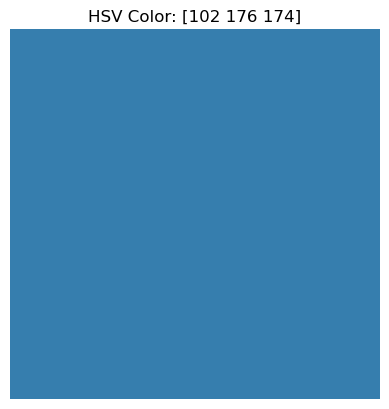

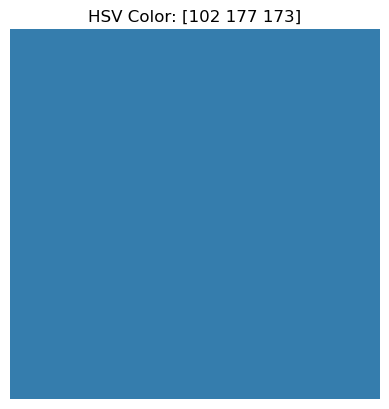

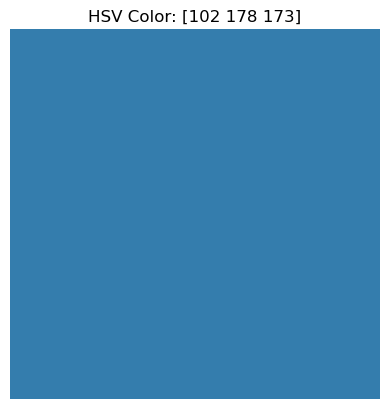

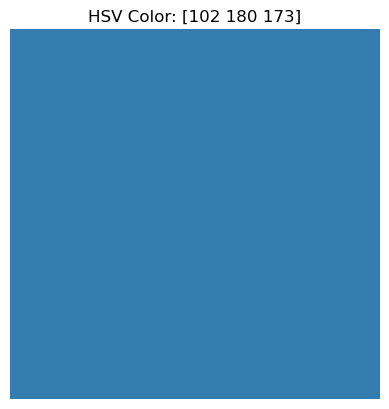

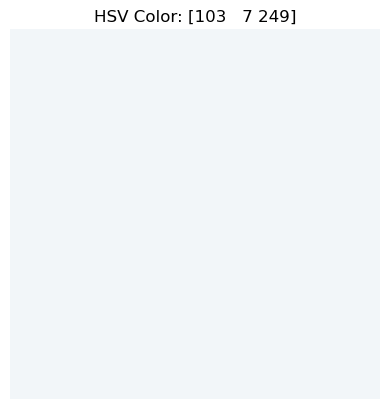

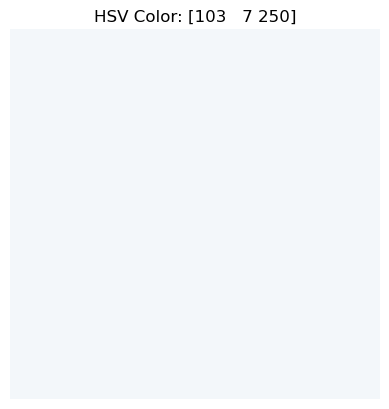

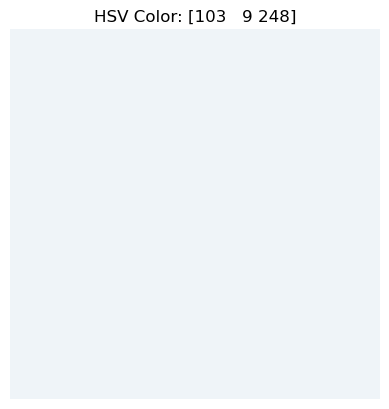

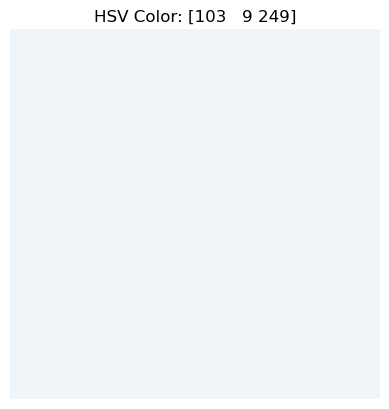

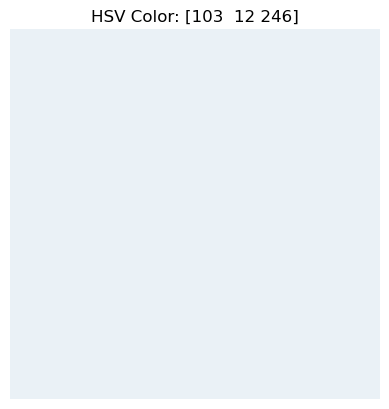

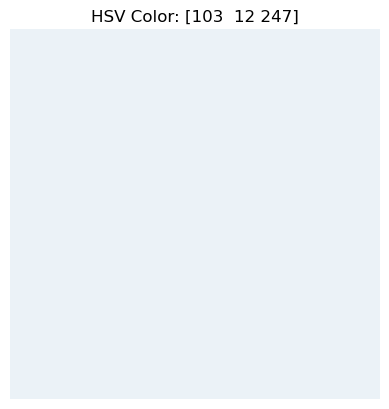

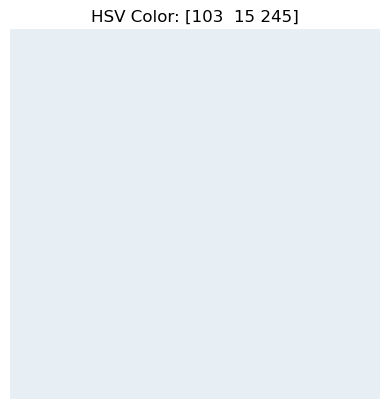

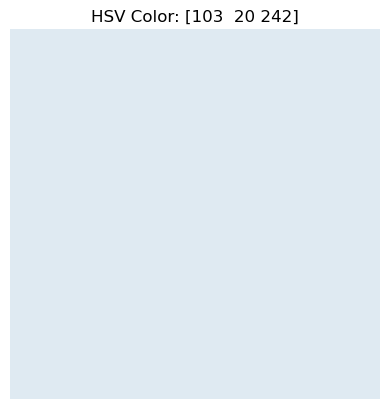

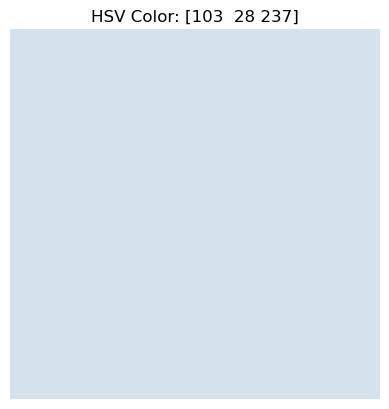

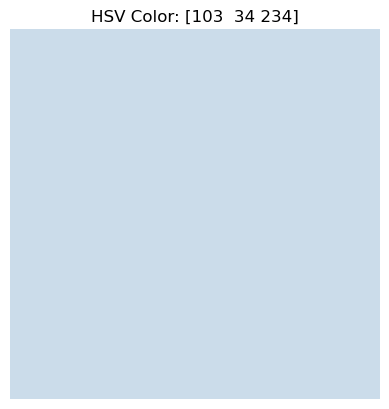

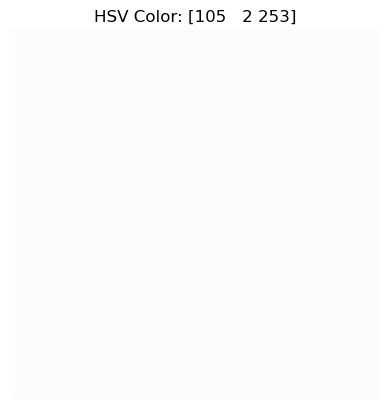

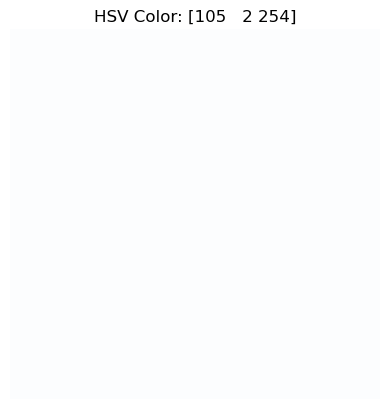

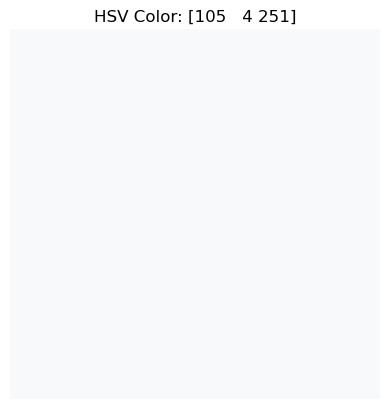

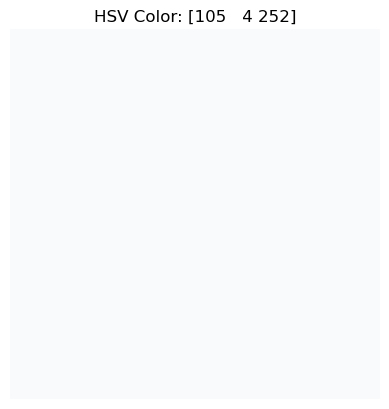

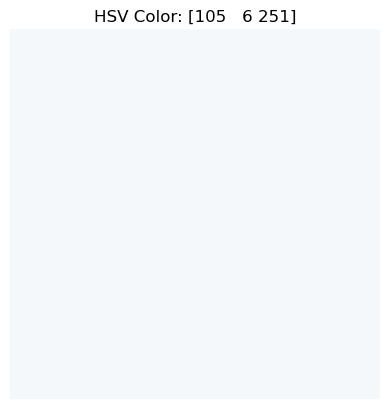

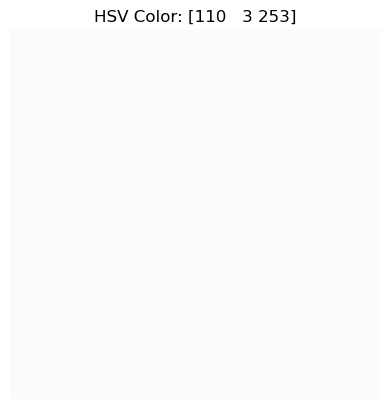

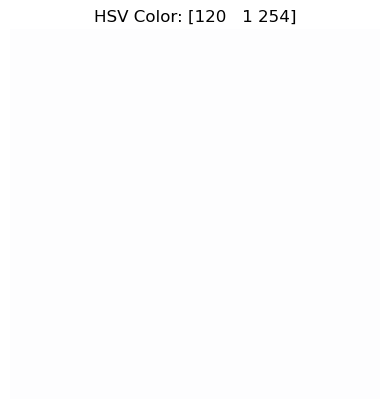

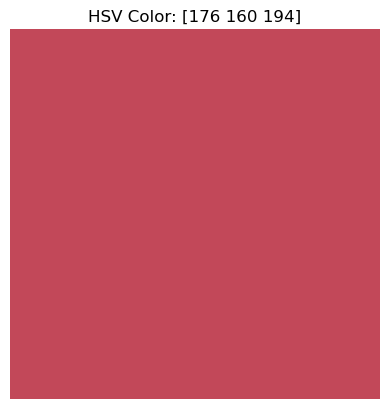

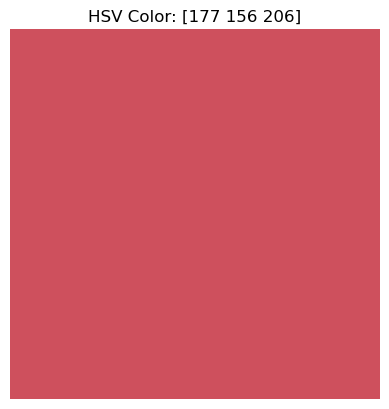

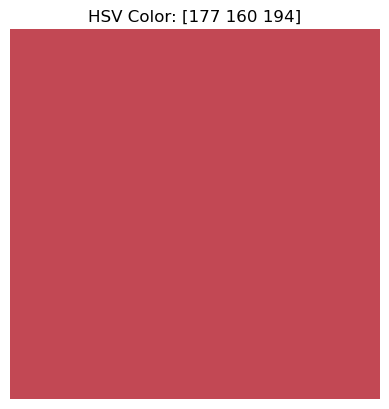

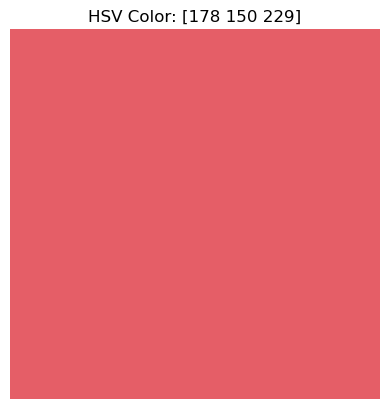

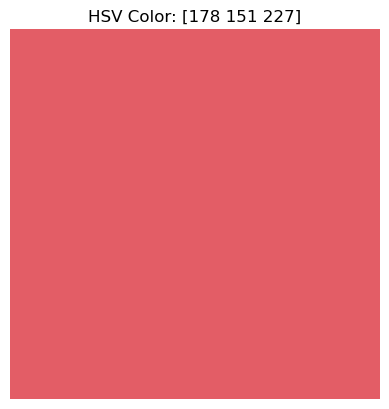

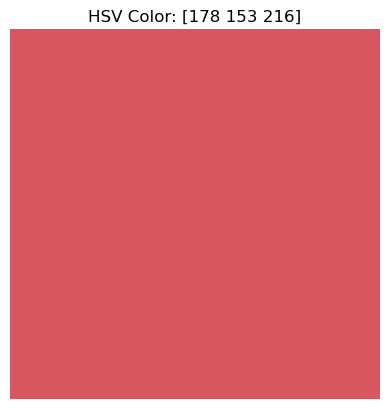

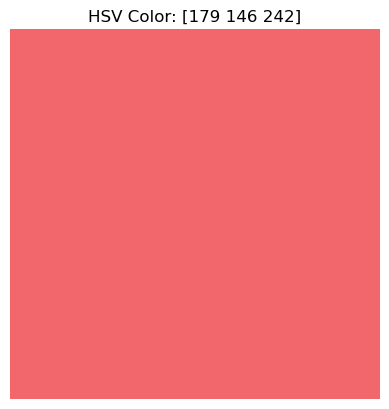

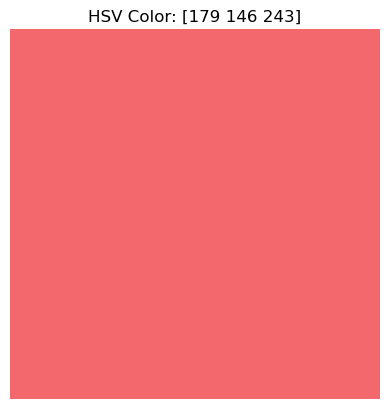

In [7]:
# Convert HSV color to RGB to determine where is the blue
for i in unique_hsv:
    hsv_value = np.uint8([[i]])
    rbg_value = cv2.cvtColor(hsv_value, cv2.COLOR_HSV2RGB)
    plt.imshow(rbg_value)
    plt.title(f'HSV Color: {i}')
    plt.axis('off')
    plt.show()
    
# I decide to choose [102, 87, 207] to [102, 180, 173] to be my range

In [8]:
hsv_range = cv2.inRange(hsv_image, np.array([102, 87, 207]), np.array([102, 180, 173]))

In [11]:
radius = 30

output_image = np.zeros_like(image)

height, width = image.shape[:2]

for y in range(height):
    for x in range(width):
        y_start = max(0, y - radius)
        y_end = min(height, y + radius + 1)
        x_start = max(0, x - radius)
        x_end = min(width, x + radius + 1)
        
        neighborhood = hsv_range[y_start : y_end, x_start : x_end]
        count = np.sum(neighborhood)
        
        total_pixels = (y_end - y_start) * (x_end - x_start)
        if count > total_pixels * 0.5:
            output_image[y, x] = image[y, x]
        else:
            output_image[y, x] = [255, 255, 255]

In [12]:
cv2.imwrite('filtered_image.png', output_image)

True